This is a group project done by me and my friends. My part is 2.4 Clustering Model.


<center>

**WQD7006 Group Assignment**

**Group: The Insight Integrators**

<center>

**Machine Learning Approach for Marketing Campaigns in
Food Company**






# **1.0 Project Background**

iFood, a popular online food delivery platform in Brazil carried out a pilot campaign on introducing its new developed gadget to the customers. Unfortunately, iFood gained a negative profit from the campaign as the revenue generated fell short to cover the cost (Nailson, 2020). This data science project aims to develop a predictive model, to forecast customer’s behaviour in accepting the offer to achieve a better performance for the future campaign. Based on the dataset, the information includes the customer’s profiles, product preferences, campaign outcomes, and channel performance metrics.

This project targets the iFood marketing departments, includes stakeholders which responsible for planning, conducting, and executing marketing campaigns to promote iFood’s new developed products. This involves a range of tasks including strategizing, implementing, and evaluating the effectiveness of marketing campaigns.

This project aims to study customer characteristics for targeted campaign offers. By interpreting the meaningful information, the company can focus on the potential customers, leaving the non-respondents and hence conduct a campaign with higher profit (Zulaikha et al., 2020). With the study of correlations between customer’s background and actions of purchasing, iFood can enhance the customer segmentation and convey advanced service to the customers. Additionally, this project’s finding may also be valuable in generating a predictive model to estimate the success of the future campaigns, by forecasting the customer’s purchasing intention.


## **1.1 Problem Statement**

The negative profit generated from the pilot campaign of iFood shows the need for a data-driven approaches to improve its marketing strategies. It is challenging to accurately estimate customer’s behaviour due to insufficient predictive capabilities of iFood. According to Zulaikha et al. (2020), the company needs to optimize the resource allocation by identifying the potential customers. As iFood lack of interpreted meaningful information about customer’s background, resources were allocated inappropriately, consumed more time and energy for the non-respondents. This has led to a high cost, but low revenue generated from the campaign. Besides, this may also negatively impact iFood’s customer’s experience as they may found that the product promoted is not advantageous to them, hence increase in the number of complaints.

In order to overcome the problem, a dataset is collected from the past campaigns for data analysis, which contains the information about customer’s profile, product preferences, campaign outcomes, and channel performance metrics. By discovering actionable insights hidden in the data, a predictive model is developed to forecast customer’s purchasing behaviour. With this meaningful information, iFood can narrow down the targeted customers effectively, reduce the cost and optimize the future campaign performance, resulting in a highly profitable marketing strategy and sustainable growth in the competitive online food delivery industry.


## **1.2 Project Objectives**

The goal of this project is to develop a predictive model that allows the user to forecast customer’s behaviour in purchasing the products, based on their background, such as annual household income, level of education, purchasing preferences, etc. The objectives of the project can be summarized as follows:  

i) To identify the relationship between customer’s background and purchasing behaviour

ii) To implement customer segmentation and targeting by incoporating membership-based segmentation.

iii)	To develop a predictive model to estimate customer’s intention to purchase the product


# **2.0 Methodology**

## **2.1 Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import os
from pathlib import Path
from scipy import stats

In [ ]:
df = pd.read_excel('marketing_campaign.xlsx')
df.head(100)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7516,1983,Graduation,Married,30096.0,1,0,2014-05-22,30,5,...,6,0,0,0,0,0,0,3,11,0
96,7247,1960,Graduation,Widow,47916.0,0,1,2012-11-22,72,505,...,6,0,1,0,0,0,0,3,11,0
97,11100,1972,Graduation,Divorced,51813.0,1,1,2013-04-11,37,51,...,7,0,0,0,0,0,0,3,11,0
98,4646,1951,2n Cycle,Married,78497.0,0,0,2013-12-01,44,207,...,2,0,0,0,1,0,0,3,11,0


In [ ]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## **2.2 Scrub**

In [ ]:
# Check missing values for each columns
print(df.isnull().values.any())
print(df.isnull().sum())

True
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


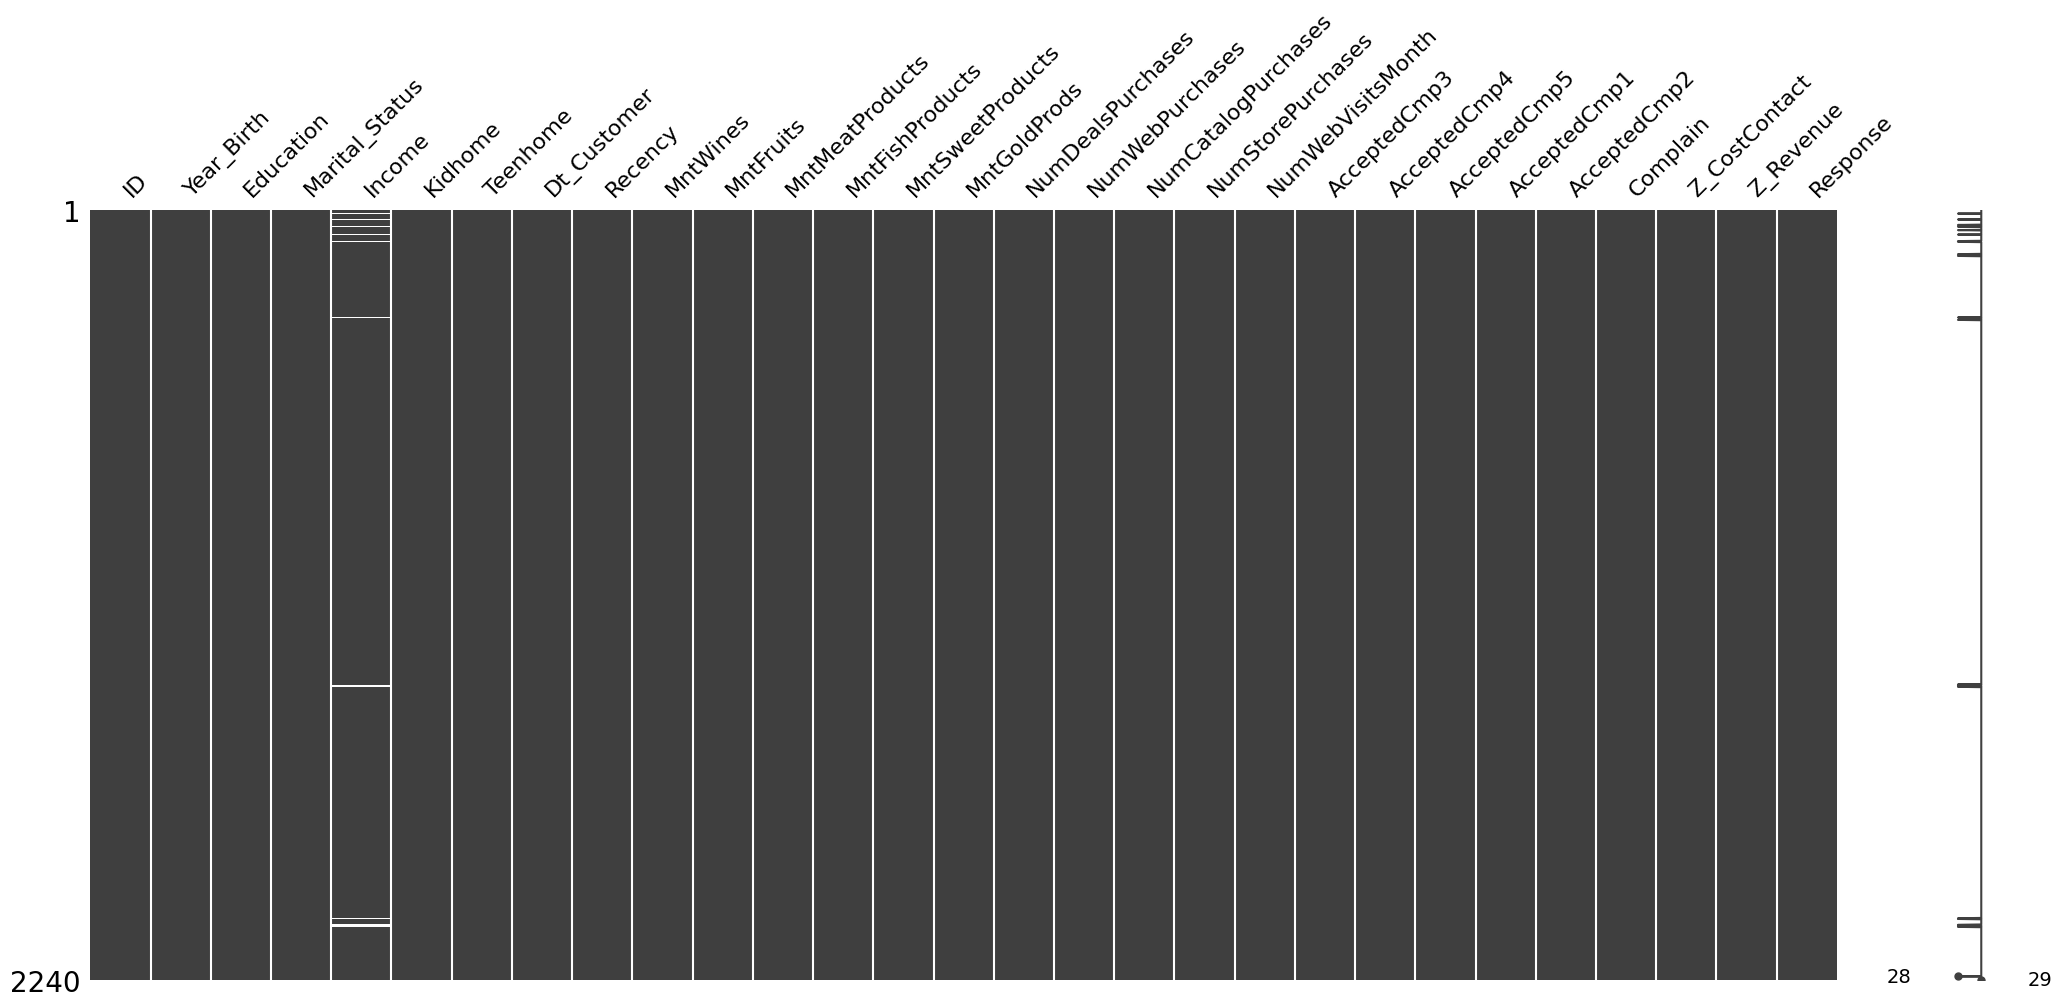

In [ ]:
# Visualize missing values using a matrix plot
msno.matrix(df)
plt.show()

In [ ]:
# Drop missing value rows from Income
df = df.dropna(subset=['Income'])
print(df.isnull().values.any())
print(df.isnull().sum())

False
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [ ]:
# Check unique values for selected columns
for feature in ['Education', 'Marital_Status']:
    feature_unique = df[feature].unique()
    print(feature, len(feature_unique), 'unique values are:', feature_unique)

Education 5 unique values are: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status 8 unique values are: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


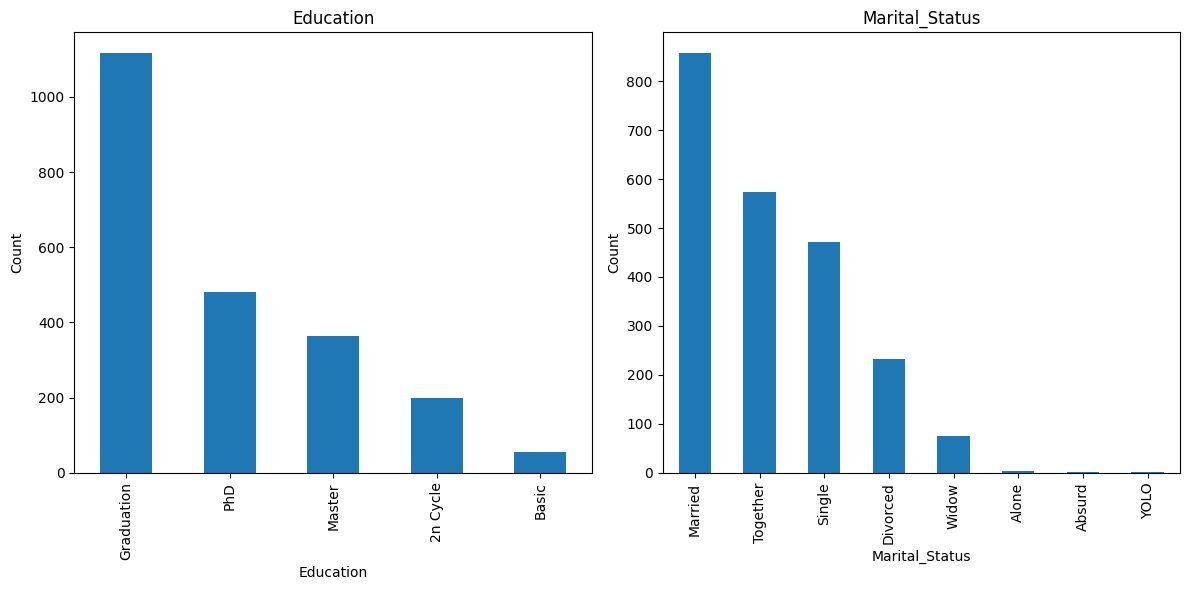

In [ ]:
# Plotting histograms for each categorical feature
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust size as needed

for index, feature in enumerate(['Education', 'Marital_Status']):
    df[feature].value_counts().plot(kind='bar', ax=axes[index], title=feature)
    axes[index].set_ylabel('Count')
    axes[index].set_xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# Update 'Education' column: Group '2n Cycle' and 'Basic' into 'Others'
df['Education'] = df['Education'].replace(['2n Cycle', 'Basic'], 'Others')

# Update 'Marital_Status' column: Change 'Alone' to 'Single', and 'Absurd', 'YOLO' to 'Others'
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Others', 'YOLO': 'Others'})

# Print the unique values of these columns
print("Unique values in 'Education':", df['Education'].unique())
print("Unique values in 'Marital_Status':", df['Marital_Status'].unique())


Unique values in 'Education': ['Graduation' 'PhD' 'Master' 'Others']
Unique values in 'Marital_Status': ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Others']


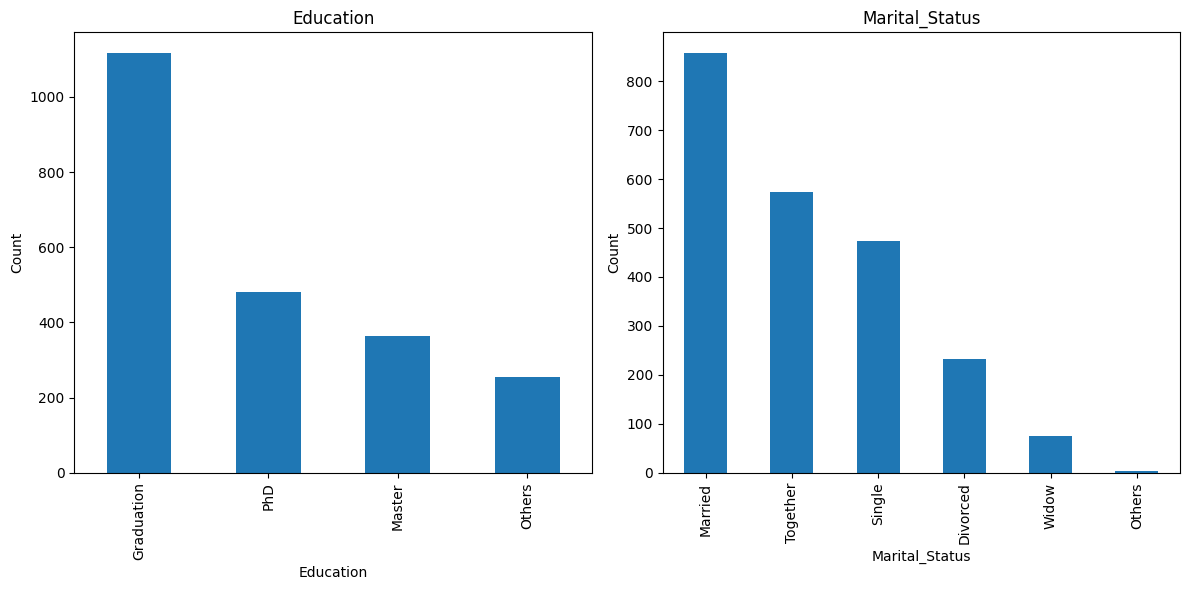

In [ ]:
# Plotting histograms for each categorical feature
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust size as needed

for index, feature in enumerate(['Education', 'Marital_Status']):
    df[feature].value_counts().plot(kind='bar', ax=axes[index], title=feature)
    axes[index].set_ylabel('Count')
    axes[index].set_xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# Check the number of duplicates
duplicate_count = df.duplicated().sum()
print("Number of duplicates:", duplicate_count)

Number of duplicates: 0


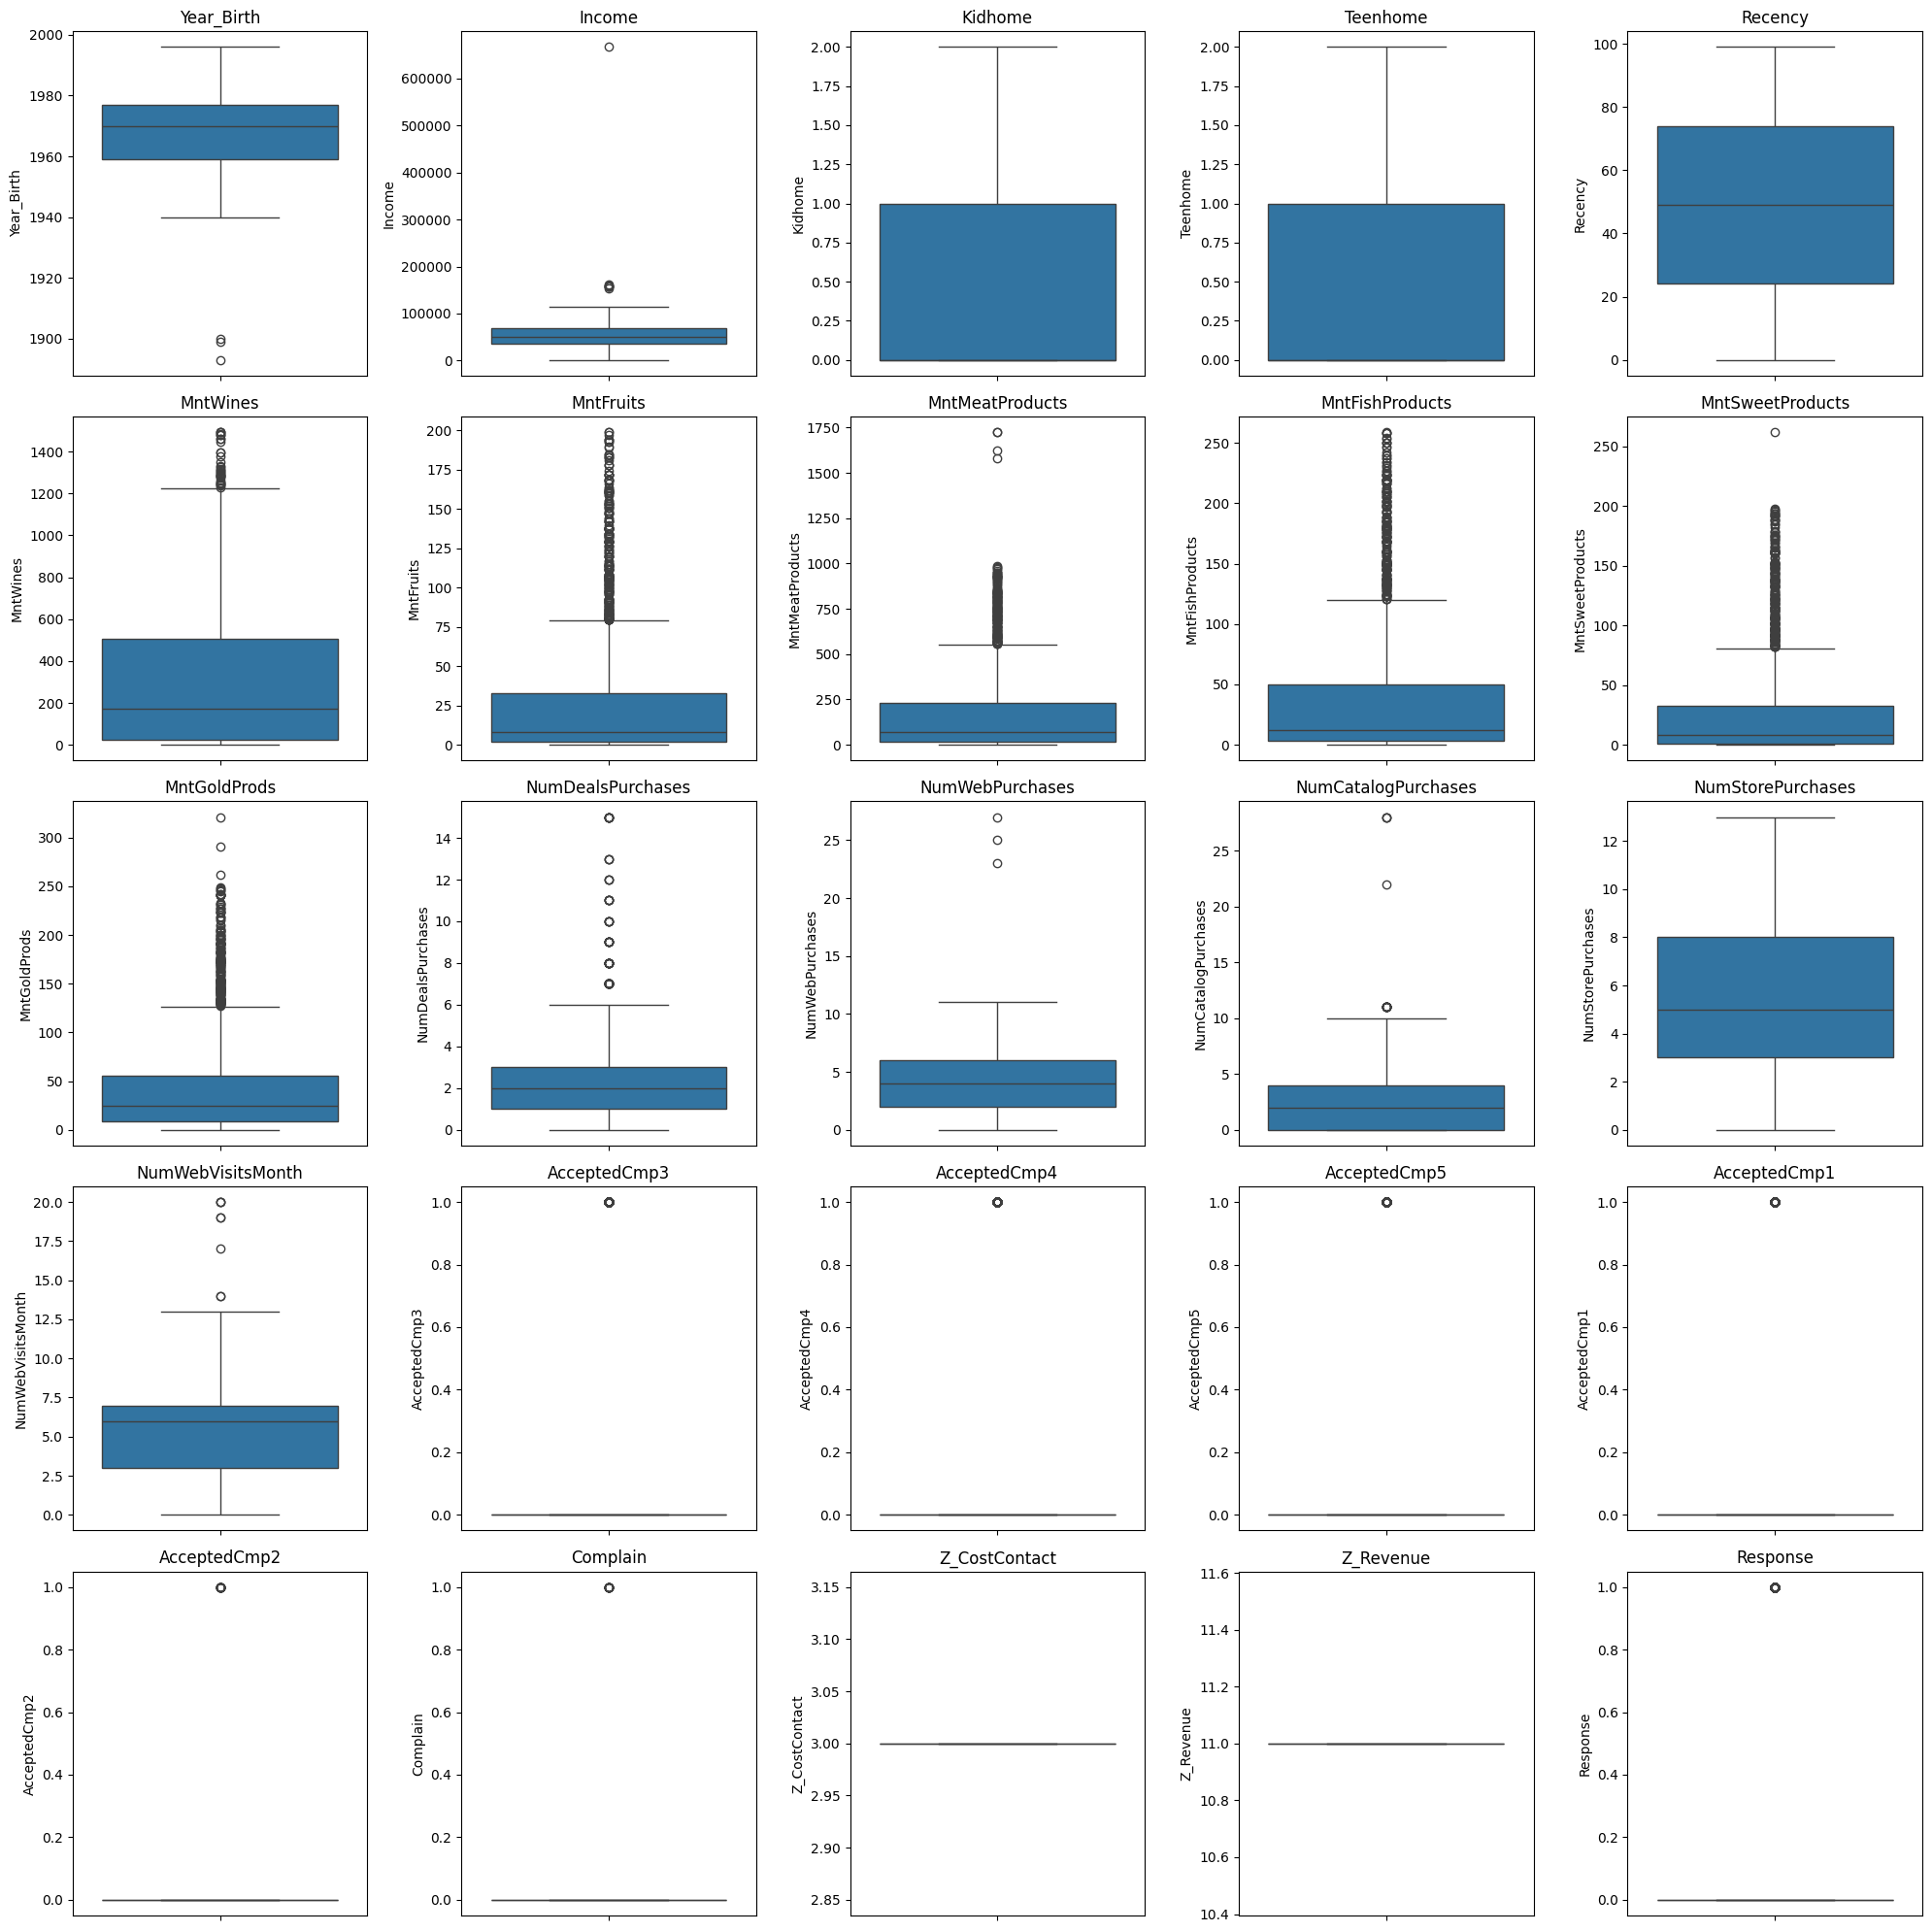

In [ ]:
numeric_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                    'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                    'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

# Creating a 5x5 grid of box plots
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 5, i)  # 5x5 grid, position i
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()

In [ ]:
# Set the threshold for defining an outlier
threshold = 3

# List of columns to assess for outliers
columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
           'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
           'NumWebVisitsMonth']


# Calculate the Z-scores for each column and collecting indices of outliers
outlier_indices = []

for column in columns:
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = np.where(z_scores > threshold)
    outlier_indices.extend(outliers[0])

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

print("Indices of outliers:", outlier_indices)

# Remove the outliers from the DataFrame
df = df.drop(index=outlier_indices)
print("Data after removing outliers has", df.shape[0], "rows.")

Indices of outliers: [1536, 515, 2052, 1027, 1030, 1029, 9, 11, 524, 1037, 1552, 530, 1555, 20, 533, 2070, 1047, 1048, 2073, 2075, 544, 546, 548, 1572, 1062, 2086, 38, 1574, 42, 45, 1071, 1584, 47, 49, 1076, 1077, 2046, 2100, 1595, 2108, 2109, 573, 1087, 578, 1605, 70, 1606, 1098, 2128, 1624, 89, 1627, 604, 93, 1120, 2145, 1634, 1636, 100, 102, 2149, 613, 2153, 2150, 2155, 1643, 621, 1134, 117, 1654, 1143, 1144, 633, 2170, 1148, 129, 642, 1155, 1669, 2188, 1166, 2191, 2194, 659, 1682, 150, 153, 1177, 157, 1696, 2209, 674, 1186, 2211, 1704, 1705, 168, 1200, 1712, 689, 1716, 181, 186, 187, 190, 702, 192, 1732, 710, 202, 203, 1232, 1240, 219, 1246, 228, 740, 1252, 229, 232, 1253, 1771, 238, 751, 241, 753, 1267, 1265, 1782, 758, 761, 1786, 1275, 1789, 766, 1791, 255, 767, 1796, 1285, 1287, 265, 777, 1807, 1298, 1810, 1300, 277, 790, 276, 281, 796, 1822, 799, 1312, 801, 1315, 804, 1829, 294, 1320, 811, 1836, 1835, 812, 1329, 1848, 1342, 1854, 832, 1345, 833, 323, 1860, 1859, 326, 839, 842, 

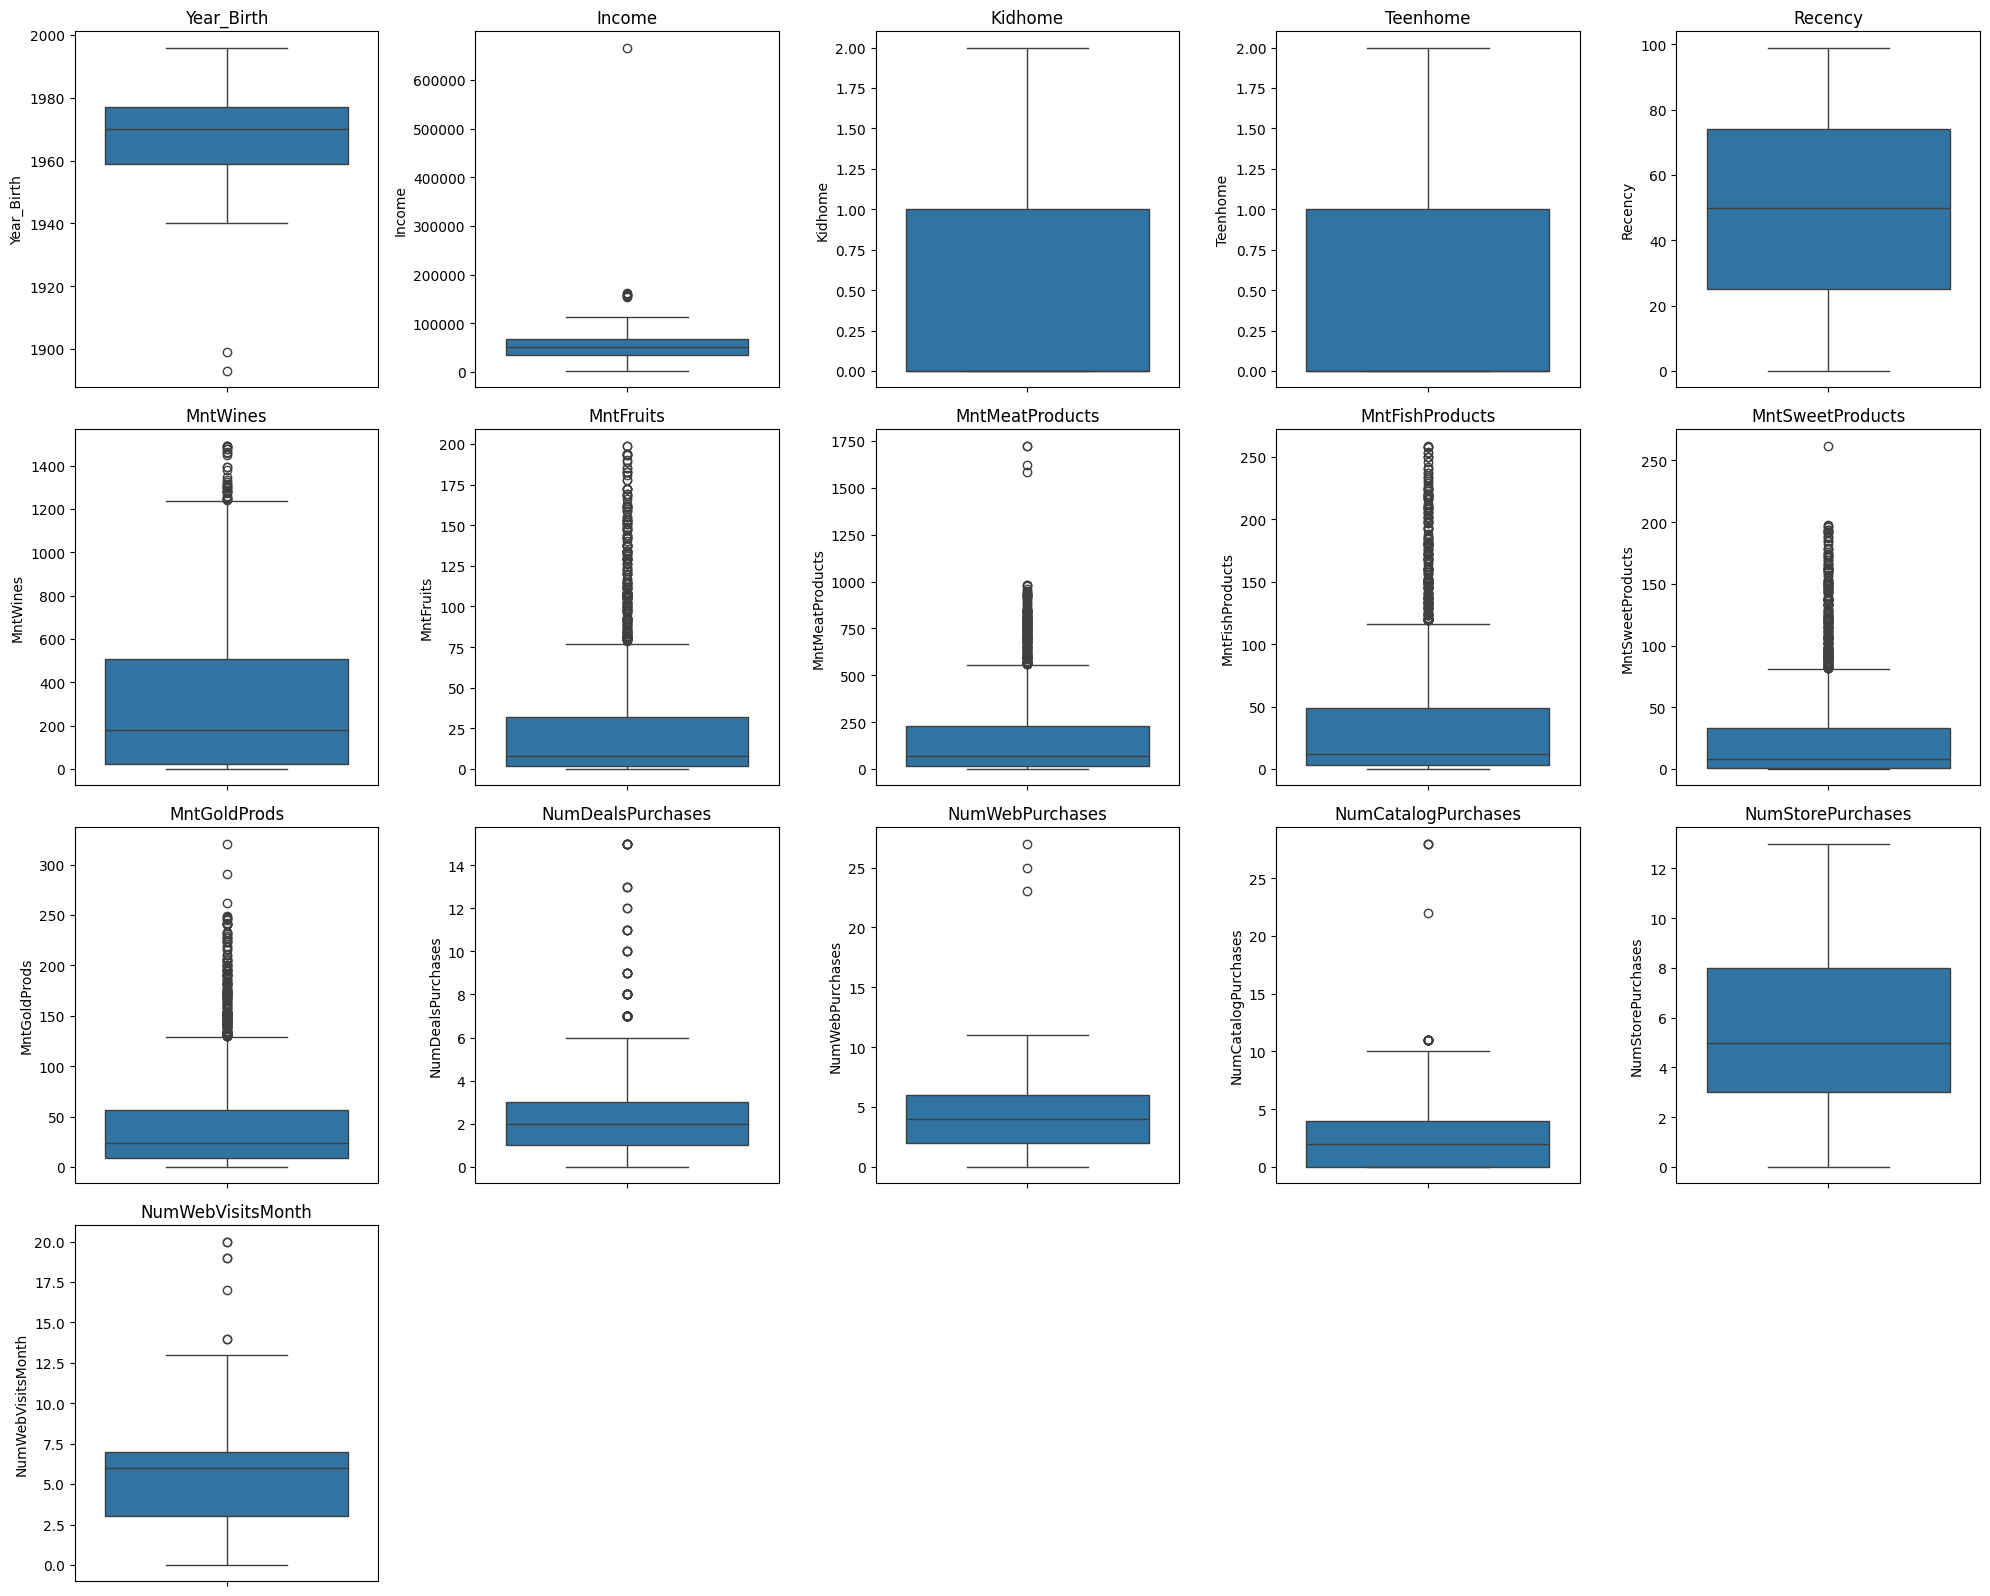

In [ ]:
numeric_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                    'NumWebVisitsMonth']

# Creating a 5x5 grid of box plots
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 5, i)  # 5x5 grid, position i
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()

In [ ]:
# Create a new DataFrame by dropping the 'Dt_Customer','Education', 'Marital_Status', 'ID' column
new_df = df.drop(columns=['Dt_Customer','Education', 'Marital_Status','ID'])

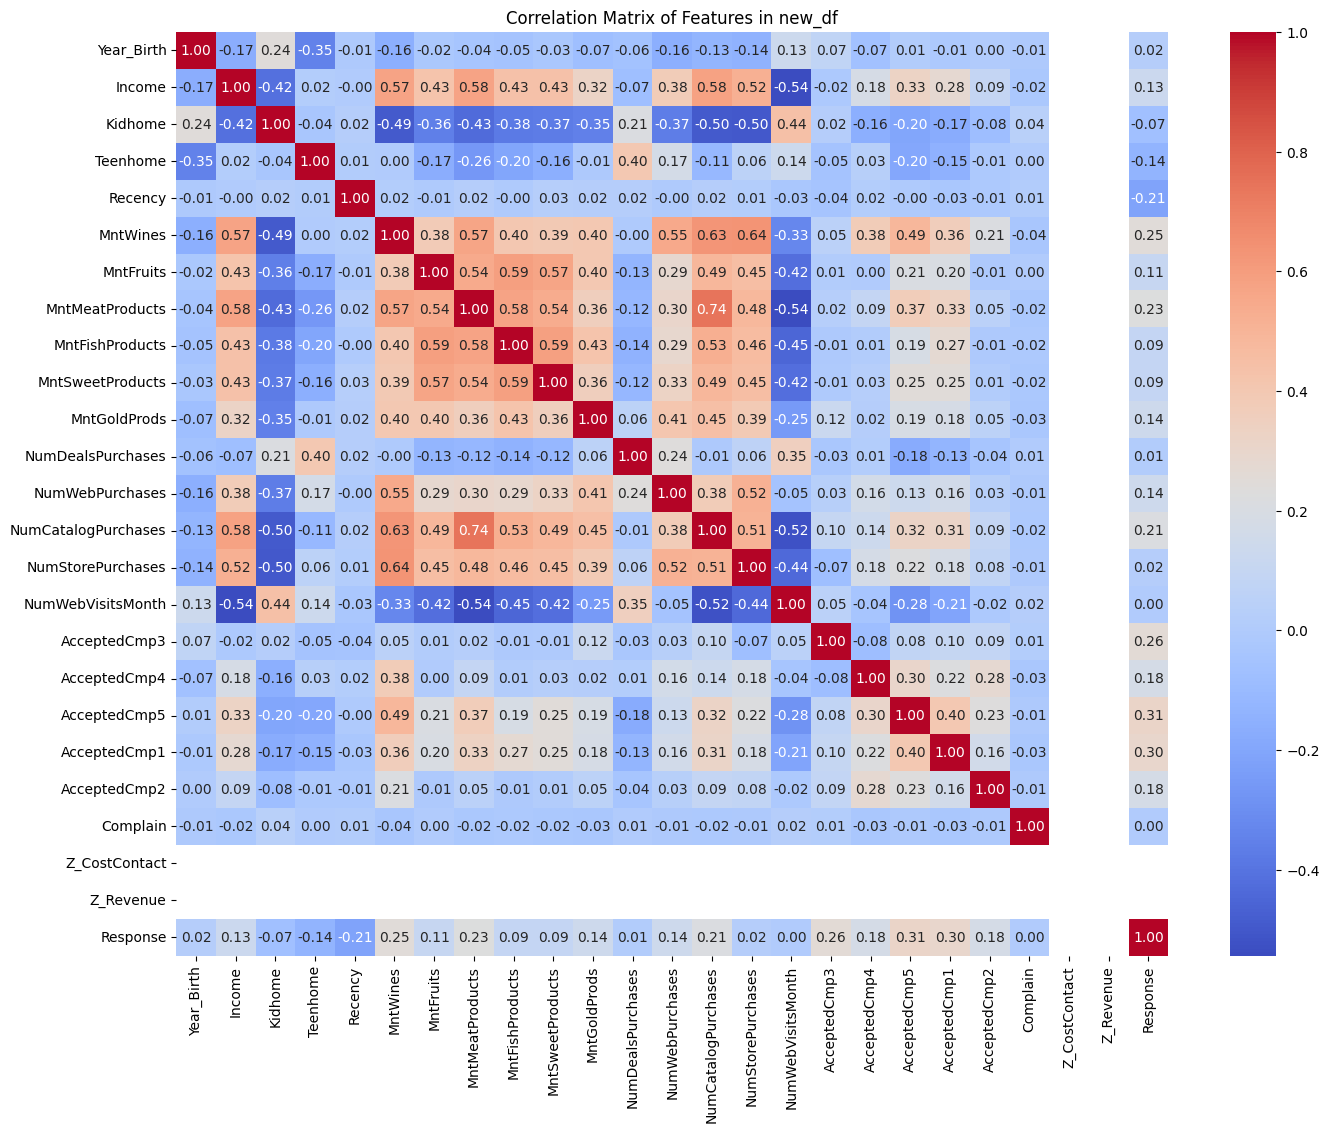

In [ ]:
# Calculate the correlation matrix for the new DataFrame
correlation_matrix_new = new_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))  # Adjust the size for better readability
sns.heatmap(correlation_matrix_new, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features in new_df')
plt.show()

In [ ]:
# Left trim all dataset
df.columns = df.columns.str.replace(' ', '')

In [ ]:
# Ensure the dt_Customer column are in datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.head(100)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,5234,1967,Others,Together,30753.0,1,1,2013-07-11,85,12,...,5,0,0,0,0,0,0,3,11,0
119,9862,1969,Graduation,Together,21918.0,1,0,2013-11-14,37,1,...,6,0,0,0,0,0,0,3,11,0
120,9805,1953,Master,Together,56129.0,0,1,2013-06-20,65,320,...,4,0,0,0,0,0,0,3,11,0
121,6205,1967,Master,Single,32557.0,1,0,2014-02-24,13,34,...,5,0,0,0,0,0,0,3,11,1


In [ ]:
# Fill empty income to 0
df['Income'].fillna(0, inplace=True)
df.head(100)

<ipython-input-19-02c4e2594f73>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(0, inplace=True)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,5234,1967,Others,Together,30753.0,1,1,2013-07-11,85,12,...,5,0,0,0,0,0,0,3,11,0
119,9862,1969,Graduation,Together,21918.0,1,0,2013-11-14,37,1,...,6,0,0,0,0,0,0,3,11,0
120,9805,1953,Master,Together,56129.0,0,1,2013-06-20,65,320,...,4,0,0,0,0,0,0,3,11,0
121,6205,1967,Master,Single,32557.0,1,0,2014-02-24,13,34,...,5,0,0,0,0,0,0,3,11,1


In [ ]:
# Change the date customer to date format to ensure data format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Calculate the difference in years between 2024 and the year of each date
df['Age']=2024-df.Year_Birth
df['Years_joining_as_customer'] = 2024 - df['Dt_Customer'].dt.year
df['Age_joining_as_customer'] = df['Age']-df['Years_joining_as_customer']
df.head(100)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_joining_as_customer,Age_joining_as_customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,67,12,55
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,70,10,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,59,11,48
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,40,10,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,43,10,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,5234,1967,Others,Together,30753.0,1,1,2013-07-11,85,12,...,0,0,0,0,3,11,0,57,11,46
119,9862,1969,Graduation,Together,21918.0,1,0,2013-11-14,37,1,...,0,0,0,0,3,11,0,55,11,44
120,9805,1953,Master,Together,56129.0,0,1,2013-06-20,65,320,...,0,0,0,0,3,11,0,71,11,60
121,6205,1967,Master,Single,32557.0,1,0,2014-02-24,13,34,...,0,0,0,0,3,11,1,57,10,47


In [ ]:
# Rename the data column to more understandable name
df = df.rename(columns={
       'Kidhome' : 'KidHome',
       'Teenhome' : 'TeenHome',
       'Dt_customer' : 'Dt_Customer',
       'Recency' : 'Recency',
        'MntWines' :'WineSales' ,
       'MntFruits' :  'FruitSales',
       'MntMeatProducts' : 'MeatSales',
       'MntFishProducts' : 'FishSales',
       'MntSweetProducts' : 'SweetSales',
       'MntGoldProds' : 'GoldSales',
       'NumDealsPurchases' : 'DealPurchases',
       'NumWebPurchases' : 'WebPurchases',
       'NumCatalogPurchases' : 'CatalogPurchases',
       'NumStorePurchases' : 'StorePurchases',
       'NumWebVisitsMonth' : 'WebVisitsMonth',
       'AcceptedCmp3' : 'Cmp3',
       'AcceptedCmp4' : 'Cmp4',
       'AcceptedCmp5' : 'Cmp5',
       'AcceptedCmp1' : 'Cmp1',
       'AcceptedCmp2' : 'Cmp2',
       'Response' : 'Cmp6',
       'Complain' : 'Complaints',
})

In [ ]:
# Rearrange the column in dataframe
df = df[['ID', 'Age','Years_joining_as_customer','Age_joining_as_customer','Recency', 'Income', 'KidHome', 'TeenHome', 'Complaints',
        'Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5', 'Cmp6', 'Education', 'Marital_Status',
        'Dt_Customer', 'WineSales', 'FruitSales', 'MeatSales', 'FishSales', 'SweetSales',
        'GoldSales', 'CatalogPurchases', 'DealPurchases', 'StorePurchases', 'WebPurchases', 'WebVisitsMonth']]


## **2.3 Explore - Data Analysis**


In [ ]:
# Sum up deal purchases, web purchases , catalog purchase and store purchase for each consumer to know their total purchases
df['Total_purchases'] = df[['DealPurchases',
       'WebPurchases',
       'CatalogPurchases',
       'StorePurchases', ]].sum(axis=1)

In [ ]:
# Sum up wine sales, FruitSales , MeatSales , FishSales and SweetSales for each consumer to know their total purchases

df['Sales'] = df[['WineSales', 'FruitSales', 'MeatSales', 'FishSales', 'SweetSales']].sum(axis=1)
df.head(100)

,ID,Age,Years_joining_as_customer,Age_joining_as_customer,Recency,Income,KidHome,TeenHome,Complaints,Cmp1,...,FishSales,SweetSales,GoldSales,CatalogPurchases,DealPurchases,StorePurchases,WebPurchases,WebVisitsMonth,Total_purchases,Sales
0,5524,67,12,55,58,58138.0,0,0,0,0,...,172,88,88,10,3,4,8,7,25,1529
1,2174,70,10,60,38,46344.0,1,1,0,0,...,2,1,6,1,2,2,1,5,6,21
2,4141,59,11,48,26,71613.0,0,0,0,0,...,111,21,42,2,1,10,8,4,21,734
3,6182,40,10,30,26,26646.0,1,0,0,0,...,10,3,5,0,2,4,2,6,8,48
4,5324,43,10,33,94,58293.0,1,0,0,0,...,46,27,15,3,5,6,5,5,19,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,5234,57,11,46,85,30753.0,1,1,0,0,...,0,9,30,1,2,3,1,5,7,51
119,9862,55,11,44,37,21918.0,1,0,0,0,...,11,5,3,0,2,3,2,6,7,30
120,9805,71,11,60,65,56129.0,0,1,0,0,...,39,72,48,2,4,10,6,4,22,612
121,6205,57,10,47,13,32557.0,1,0,0,0,...,0,4,10,1,3,3,2,5,9,70


In [ ]:
# Assume the date collection is 2024.3.12
# Recency day assume from 2024.3.12
from datetime import datetime, timedelta
today_date = datetime.today()
df['Last_Visit_Date'] = today_date - pd.to_timedelta(df['Recency'], unit='D')
df.head(100)

,ID,Age,Years_joining_as_customer,Age_joining_as_customer,Recency,Income,KidHome,TeenHome,Complaints,Cmp1,...,SweetSales,GoldSales,CatalogPurchases,DealPurchases,StorePurchases,WebPurchases,WebVisitsMonth,Total_purchases,Sales,Last_Visit_Date
0,5524,67,12,55,58,58138.0,0,0,0,0,...,88,88,10,3,4,8,7,25,1529,2024-09-25 05:39:49.472442
1,2174,70,10,60,38,46344.0,1,1,0,0,...,1,6,1,2,2,1,5,6,21,2024-10-15 05:39:49.472442
2,4141,59,11,48,26,71613.0,0,0,0,0,...,21,42,2,1,10,8,4,21,734,2024-10-27 05:39:49.472442
3,6182,40,10,30,26,26646.0,1,0,0,0,...,3,5,0,2,4,2,6,8,48,2024-10-27 05:39:49.472442
4,5324,43,10,33,94,58293.0,1,0,0,0,...,27,15,3,5,6,5,5,19,407,2024-08-20 05:39:49.472442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,5234,57,11,46,85,30753.0,1,1,0,0,...,9,30,1,2,3,1,5,7,51,2024-08-29 05:39:49.472442
119,9862,55,11,44,37,21918.0,1,0,0,0,...,5,3,0,2,3,2,6,7,30,2024-10-16 05:39:49.472442
120,9805,71,11,60,65,56129.0,0,1,0,0,...,72,48,2,4,10,6,4,22,612,2024-09-18 05:39:49.472442
121,6205,57,10,47,13,32557.0,1,0,0,0,...,4,10,1,3,3,2,5,9,70,2024-11-09 05:39:49.472442


In [ ]:
# Count on mean for years_joining_as_Customer, age, income, recency
meandf = df[['Age', 'Income','Recency','Years_joining_as_customer']] \
            .mean().sort_values().to_frame(name = 'Mean')
display(meandf)

,Mean
Years_joining_as_customer,10.968766
Recency,49.182796
Age,55.268305
Income,52291.384025


In [ ]:
# Corelation between total purchase and income, the coefficient is 55% related to each others
correlation = df['Total_purchases'].corr(df['Income'])

print("Correlation coefficient between Total Purchase and Income:", correlation)

Correlation coefficient between Total Purchase and Income: 0.5614927591833004


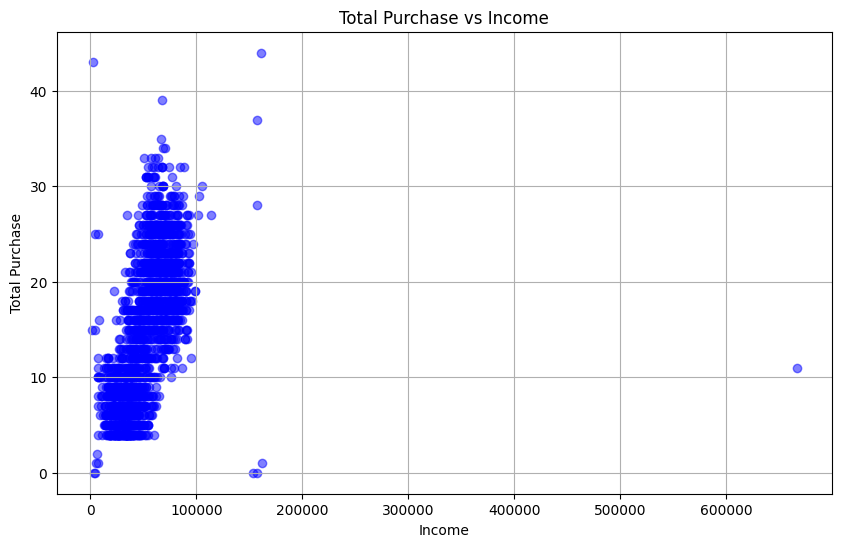

In [ ]:
# Understand the relationship between income and total purchases using a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Total_purchases'], alpha=0.5, color='blue')
plt.title('Total Purchase vs Income')
plt.xlabel('Income')
plt.ylabel('Total Purchase')
plt.grid(True)
plt.show()

In [ ]:
filtered_df = df[df['Cmp1'] == 1]

# Sum up the values of specified columns
total_sales = filtered_df[['WineSales', 'FruitSales', 'MeatSales', 'FishSales', 'SweetSales']].sum()

print(total_sales)

WineSales     101351
FruitSales      7257
MeatSales      59199
FishSales      12323
SweetSales      8676
dtype: int64


In [ ]:
columns_to_sum = ['WineSales', 'FruitSales', 'MeatSales', 'FishSales', 'SweetSales']

# Group by 'Cmp1' through 'Cmp5' and sum the sales for each category
total_sales_by_cmp = filtered_df.groupby(['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5'])[columns_to_sum].sum()

def highlight_top(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function to each column of the DataFrame
styled_total_sales_by_cmp = total_sales_by_cmp.style.apply(highlight_top, axis=0)

# Display the styled dataframe
styled_total_sales_by_cmp


In [ ]:
# Group last visit date and count on the number of complaint in a day
summary_df = df.groupby('Last_Visit_Date')['Complaints'].sum().reset_index()
summary_df.columns = ['Last Visit Date', 'Total Number of Complaints']
pd.set_option('display.max_rows', None)
summary_df

,Last Visit Date,Total Number of Complaints
0,2024-08-15 05:39:49.472442,0
1,2024-08-16 05:39:49.472442,0
2,2024-08-17 05:39:49.472442,0
3,2024-08-18 05:39:49.472442,0
4,2024-08-19 05:39:49.472442,0
5,2024-08-20 05:39:49.472442,0
6,2024-08-21 05:39:49.472442,1
7,2024-08-22 05:39:49.472442,2
8,2024-08-23 05:39:49.472442,0
9,2024-08-24 05:39:49.472442,0


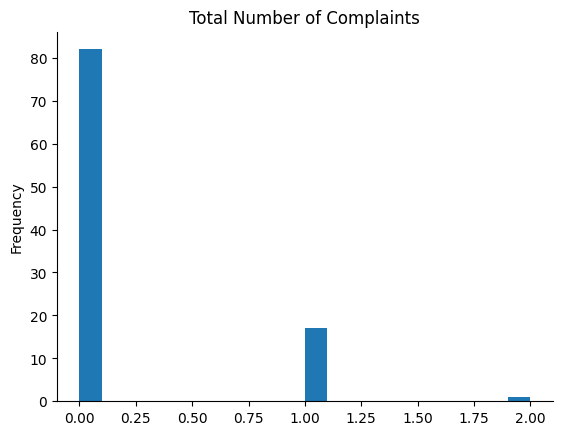

In [ ]:
# Title Total Number of Complaints

from matplotlib import pyplot as plt
summary_df['Total Number of Complaints'].plot(kind='hist', bins=20, title='Total Number of Complaints')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# List out all historical complaint customer
complaint_customer = df[df['Complaints'] > 0]
complaint_customer

,ID,Age,Years_joining_as_customer,Age_joining_as_customer,Recency,Income,KidHome,TeenHome,Complaints,Cmp1,...,SweetSales,GoldSales,CatalogPurchases,DealPurchases,StorePurchases,WebPurchases,WebVisitsMonth,Total_purchases,Sales,Last_Visit_Date
78,10401,48,11,37,12,26326.0,0,0,1,0,...,3,9,0,1,3,0,3,4,9,2024-11-10 05:39:49.472442
147,3120,43,11,32,49,38547.0,1,0,1,0,...,1,4,0,1,2,1,8,4,18,2024-10-04 05:39:49.472442
271,5726,41,10,31,15,31788.0,1,0,1,0,...,8,6,0,3,4,3,5,10,54,2024-11-07 05:39:49.472442
358,6142,81,11,70,65,65073.0,0,0,1,0,...,0,8,3,1,5,5,2,14,892,2024-09-18 05:39:49.472442
590,3710,40,12,28,41,39684.0,1,0,1,0,...,4,17,1,2,2,2,7,7,64,2024-10-12 05:39:49.472442
972,10995,36,12,24,8,15716.0,1,0,1,0,...,7,26,0,3,4,3,8,10,66,2024-11-14 05:39:49.472442
1041,6730,70,12,58,92,38998.0,1,1,1,0,...,0,5,0,3,3,2,8,8,49,2024-08-22 05:39:49.472442
1069,2875,46,10,36,93,67023.0,0,0,1,0,...,8,17,7,1,13,3,2,24,889,2024-08-21 05:39:49.472442
1180,359,74,11,63,33,48070.0,0,1,1,0,...,9,19,2,3,6,8,7,19,485,2024-10-20 05:39:49.472442
1201,9500,65,11,54,66,58113.0,0,1,1,0,...,78,84,2,3,8,9,7,22,674,2024-09-17 05:39:49.472442


In [ ]:
# Statistics summary for complaint customer on total purchases and sales

num_rows_complaint_customer = complaint_customer.shape[0]
sum_total_purchases = complaint_customer['Total_purchases'].sum()
mean_total_purchases = complaint_customer['Total_purchases'].mean()
median_total_purchases = complaint_customer['Total_purchases'].median()
sum_sales = complaint_customer['Sales'].sum()
mean_sales = complaint_customer['Sales'].mean()
median_sales = complaint_customer['Sales'].median()
print("\nSummary Statistics for Total Purchases for Complaint Customer:")
print("Number of complaints:",len(complaint_customer))
print("Sum of Total purchase:", sum_total_purchases)
print("Mean of Total purchase:", mean_total_purchases)
print("Median of Total purchase:", median_total_purchases)

print("Sum of Total sales:", sum_sales)
print("Mean of Total sales:", mean_sales)
print("Median of Total sales:", median_sales)


Summary Statistics for Total Purchases for Complaint Customer:
Number of complaints: 19
Sum of Total purchase: 265
Mean of Total purchase: 13.947368421052632
Median of Total purchase: 10.0
Sum of Total sales: 7249
Mean of Total sales: 381.5263157894737
Median of Total sales: 89.0


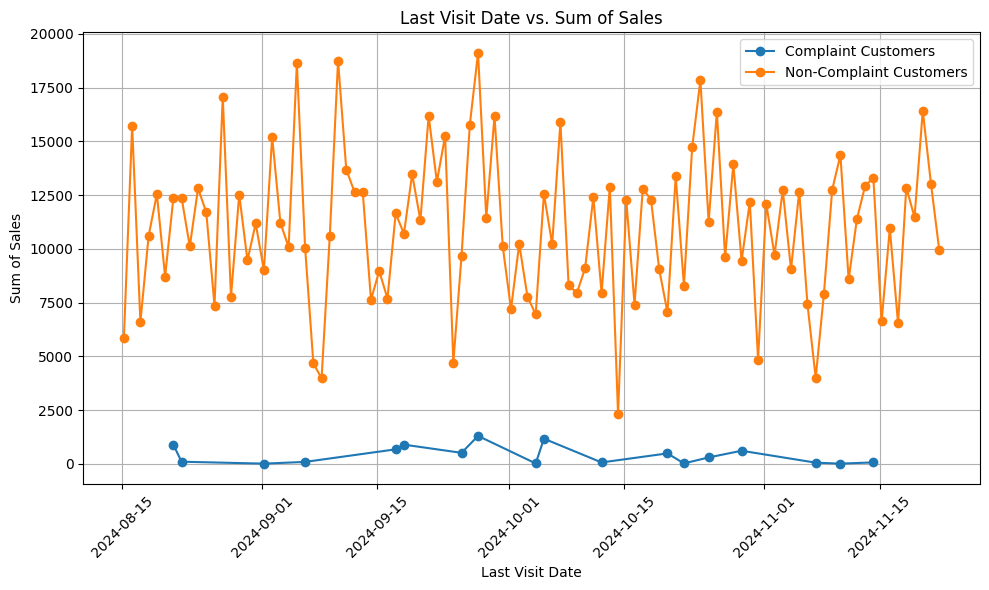

In [ ]:
# Split the sum of sales by complaint and non complaint customer and to see the trend of sales of complaint vs non compliant customer
complaint_df = df[df['Complaints'] > 0]
non_complaint_df = df[df['Complaints'] == 0]
complaint_sales_by_date = complaint_df.groupby('Last_Visit_Date')['Sales'].sum()
non_complaint_sales_by_date = non_complaint_df.groupby('Last_Visit_Date')['Sales'].sum()
plt.figure(figsize=(10, 6))
plt.plot(complaint_sales_by_date.index, complaint_sales_by_date.values, label='Complaint Customers', marker='o')
plt.plot(non_complaint_sales_by_date.index, non_complaint_sales_by_date.values, label='Non-Complaint Customers', marker='o')
plt.title('Last Visit Date vs. Sum of Sales')
plt.xlabel('Last Visit Date')
plt.ylabel('Sum of Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


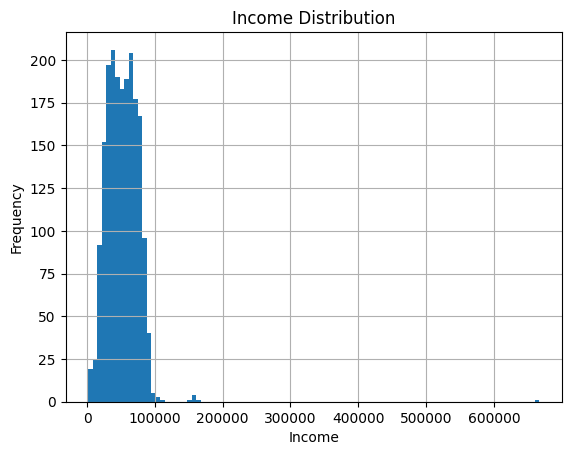

In [ ]:
# Plotting a histogram for the 'Income' column
df['Income'].hist(bins=100)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

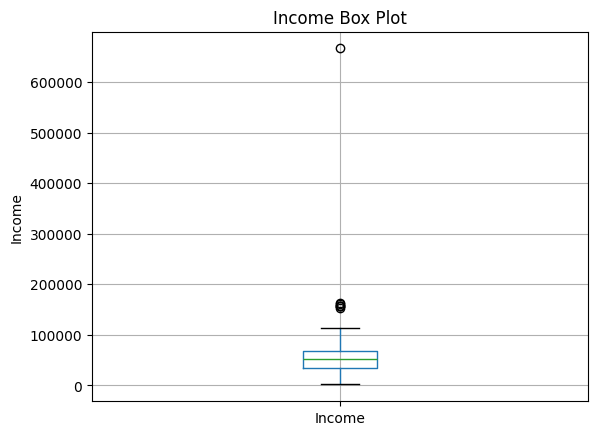

In [ ]:
# Graphical representation of the distribution of data based on the five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.
df.boxplot(column=['Income'])
plt.title('Income Box Plot')
plt.ylabel('Income')
plt.show()

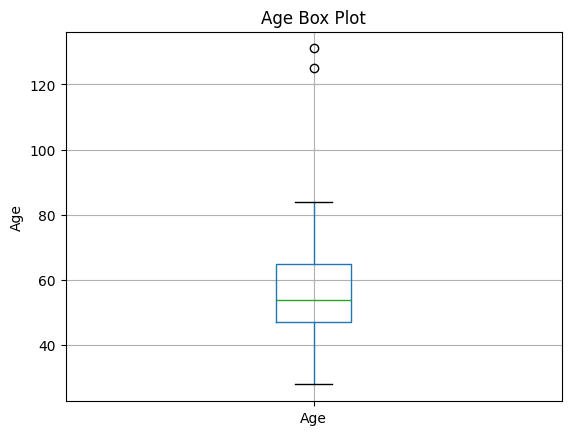

In [ ]:
df.boxplot(column=['Age'])
plt.title('Age Box Plot')
plt.ylabel('Age')
plt.show()

<ipython-input-40-c9076402392a>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_counts = df.groupby(['Age Group','Cmp6']).size().unstack(fill_value=0)


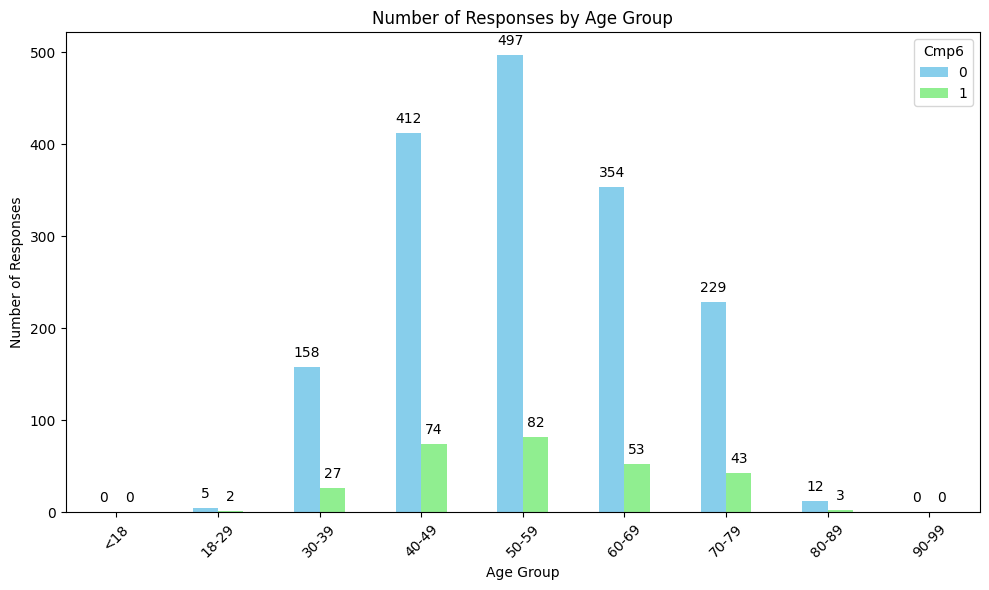

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define age bins and labels for the age groups
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['<18', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Create 'Age Group' column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the number of responses for each age group
response_counts = df.groupby(['Age Group','Cmp6']).size().unstack(fill_value=0)

# Plotting the bar chart
ax= response_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])

plt.title('Number of Responses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)

# Annotate frequency on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


The 50-59 age group has the highest number of responses, both non-responders and positive responders, indicating strong engagement with the campaign. The highest overall engagement is seen in the middle-aged groups (40-69).

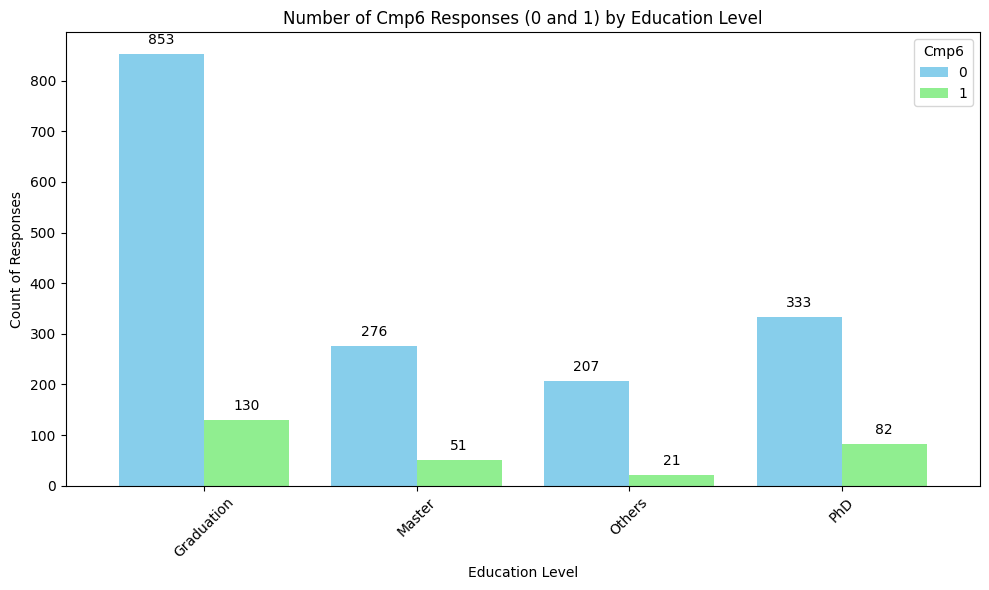

In [ ]:
# Group by 'Education' and 'Cmp6', then count instances
response_counts = df.groupby(['Education', 'Cmp6']).size().unstack(fill_value=0)

# Plotting the bar chart
ax = response_counts.plot(kind='bar', figsize=(10, 6), width=0.8, color=['skyblue', 'lightgreen'])

plt.title('Number of Cmp6 Responses (0 and 1) by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Annotate frequency on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

The "Graduation" category has the highest number of responses in both categories, indicating that graduates make up the largest portion of the dataset.

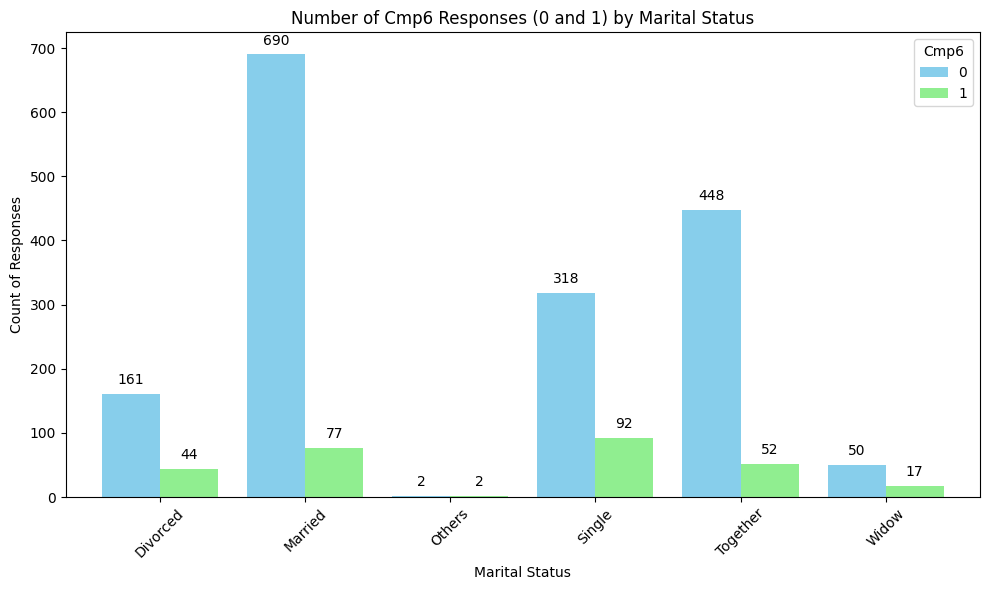

In [ ]:
# Group by 'Marital_Status' and 'Cmp6', then count instances
response_counts = df.groupby(['Marital_Status', 'Cmp6']).size().unstack(fill_value=0)

# Plotting the bar chart
ax = response_counts.plot(kind='bar', figsize=(10, 6), width=0.8, color=['skyblue', 'lightgreen'])

plt.title('Number of Cmp6 Responses (0 and 1) by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45)

# Annotate frequency on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Single individuals constitute the largest group of respondents, followed by those who are married. Married groups have a higher number of non-responders as well.

<ipython-input-43-fa88f71d0b09>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_counts = df.groupby(['Income Range', 'Cmp6']).size().unstack(fill_value=0)


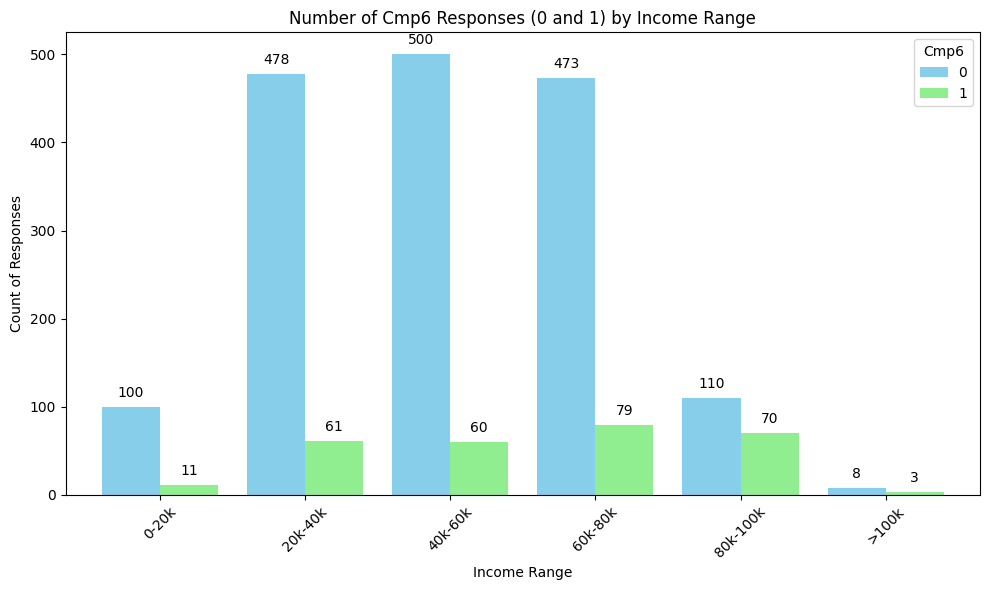

In [ ]:
# Define income bins and labels, including the >100000 group
income_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '>100k']

# Create 'Income Range' column
df['Income Range'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Cmp6', then count instances
response_counts = df.groupby(['Income Range', 'Cmp6']).size().unstack(fill_value=0)

# Plotting the bar chart
ax = response_counts.plot(kind='bar', figsize=(10, 6), width=0.8, color=['skyblue', 'lightgreen'])

plt.title('Number of Cmp6 Responses (0 and 1) by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45)

# Annotate frequency on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Individuals in higher income ranges (60K and above) show a higher tendency to respond positively to the campaign, indicating that income may influence engagement levels.

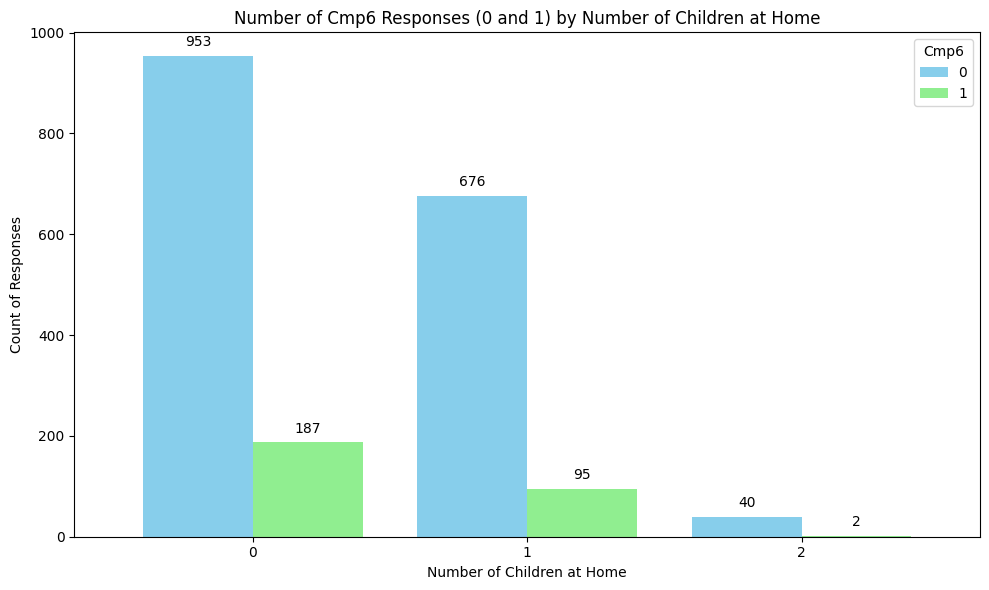

In [ ]:
# Group by 'Kidhome' and get counts for each category of 'Cmp6'
response_counts = df.groupby(['KidHome', 'Cmp6']).size().unstack(fill_value=0)

# Plotting the bar chart
ax = response_counts.plot(kind='bar', figsize=(10, 6), width=0.8,color=['skyblue', 'lightgreen'])

plt.title('Number of Cmp6 Responses (0 and 1) by Number of Children at Home')
plt.xlabel('Number of Children at Home')
plt.ylabel('Count of Responses')
plt.xticks(rotation=0)

# Annotate frequency on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Families with no children at home show the highest engagement levels, followed by those with one child. Families with two children exhibit the lowest engagement.

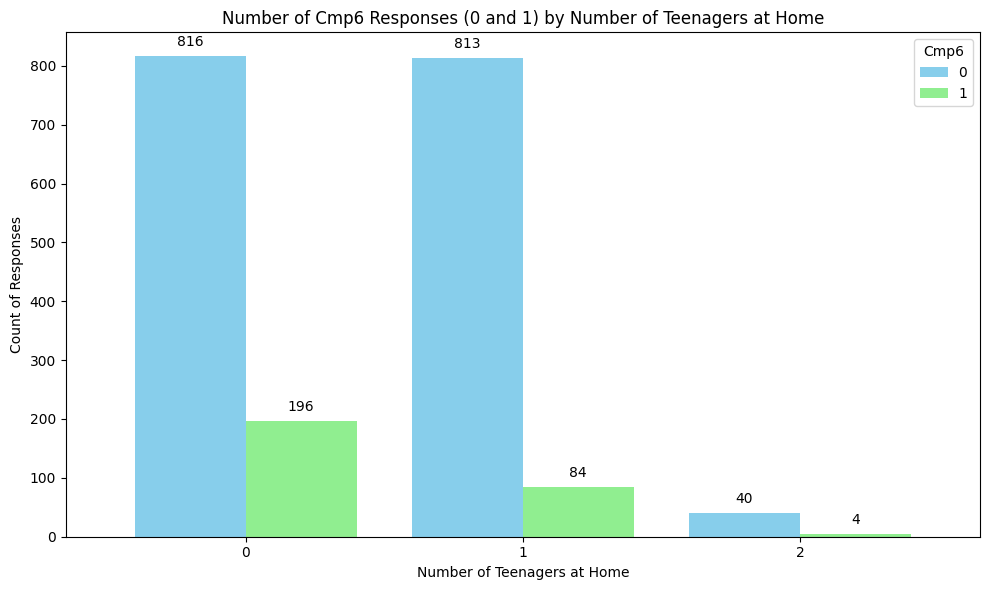

In [ ]:
# Group by 'TeenHome' and get counts for each category of 'Cmp6'
response_counts = df.groupby(['TeenHome', 'Cmp6']).size().unstack(fill_value=0)

# Plotting the bar chart
ax = response_counts.plot(kind='bar', figsize=(10, 6), width=0.8, color=['skyblue', 'lightgreen'])

plt.title('Number of Cmp6 Responses (0 and 1) by Number of Teenagers at Home')
plt.xlabel('Number of Teenagers at Home')
plt.ylabel('Count of Responses')
plt.xticks(rotation=0)

# Annotate frequency on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Families with no teenagers at home show the highest engagement levels, followed by those with one teenager. Families with two teenagers exhibit the lowest engagement.

##**2.4 Clustering Model**


###RFM Segmentation

RFM segmentation is based on customer behavior such as spending, comsumption habit, product/service usage and previously purchased product.

* Recency (R): The last time customer bought a product.
* Frequency (F): Frequency of customer making a purchase.
* Monetary Value(M): The total value of expenditure from customer.

In [ ]:
# Create 2 additional variables for F and M
# Frequency= the total number of times a customer purchases a product.
# Monetary = the total of customer expenditure.
# because there is no price on the dataset, we will calculate from the summation of the product sales without multiplying the product price

df_clustering=df.copy()
df_clustering['Frequency']=df_clustering['DealPurchases']+df_clustering['WebPurchases']+df_clustering['CatalogPurchases']+df_clustering['StorePurchases']
df_clustering['Monetary']=df_clustering['WineSales']+df_clustering['FruitSales']+df_clustering['MeatSales']+df_clustering['FishSales']+df_clustering['SweetSales']+df_clustering['GoldSales']
df_clustering.head(10)

,ID,Age,Years_joining_as_customer,Age_joining_as_customer,Recency,Income,KidHome,TeenHome,Complaints,Cmp1,...,FishSales,SweetSales,GoldSales,CatalogPurchases,DealPurchases,StorePurchases,WebPurchases,WebVisitsMonth,Frequency,Monetary
0,5524,67,12,55,58,58138.0,0,0,0,0,...,172,88,88,10,3,4,8,7,25,1617
1,2174,70,10,60,38,46344.0,1,1,0,0,...,2,1,6,1,2,2,1,5,6,27
2,4141,59,11,48,26,71613.0,0,0,0,0,...,111,21,42,2,1,10,8,4,21,776
3,6182,40,10,30,26,26646.0,1,0,0,0,...,10,3,5,0,2,4,2,6,8,53
4,5324,43,10,33,94,58293.0,1,0,0,0,...,46,27,15,3,5,6,5,5,19,422
5,7446,57,11,46,16,62513.0,0,1,0,0,...,0,42,14,4,2,10,6,6,22,716
6,965,53,12,41,34,55635.0,0,1,0,0,...,50,49,27,3,4,7,7,6,21,590
7,6177,39,11,28,32,33454.0,1,0,0,0,...,3,1,23,0,2,4,4,8,10,169
8,4855,50,11,39,19,30351.0,1,0,0,0,...,3,3,2,0,1,2,3,9,6,46
12,2125,65,11,54,82,63033.0,0,0,0,0,...,225,112,30,4,1,8,3,2,16,1102


Text(0.5, 1.0, 'Recency')

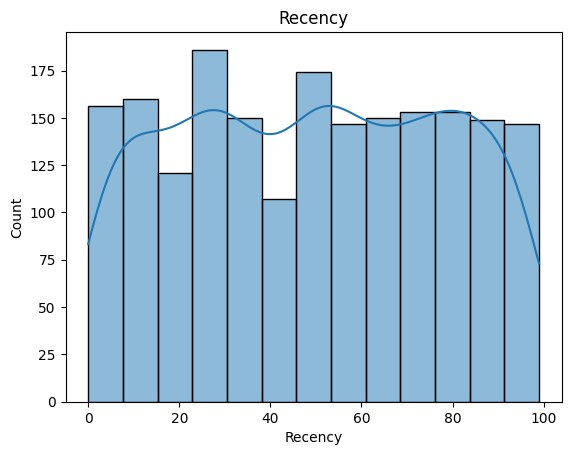

In [ ]:
# Recency
recency = df_clustering[['ID','Recency']]
recency.head(10)

sns.histplot(df_clustering['Recency'], kde=True)
plt.title('Recency')


The distribution of the recency of the customer is close to uniform distribution. This means that the distribution is fairly spread from the customers that recently did a transaction to the customers that did the transaction almost 100 days ago.

Text(0.5, 1.0, 'Frequency')

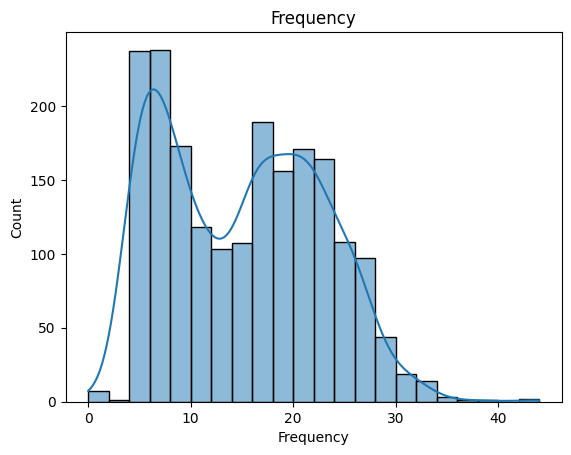

In [ ]:
# Frequency
frequency = df_clustering[['ID','Frequency']]
frequency.head(10)

sns.histplot(df_clustering['Frequency'], kde=True)
plt.title('Frequency')

The transaction frequency of each customer is between 1 transaction up to around 44 transactions. With most of them doing around 4 to 10 transactions followed by 16 to 24 transactions.

Text(0.5, 1.0, 'Monetary')

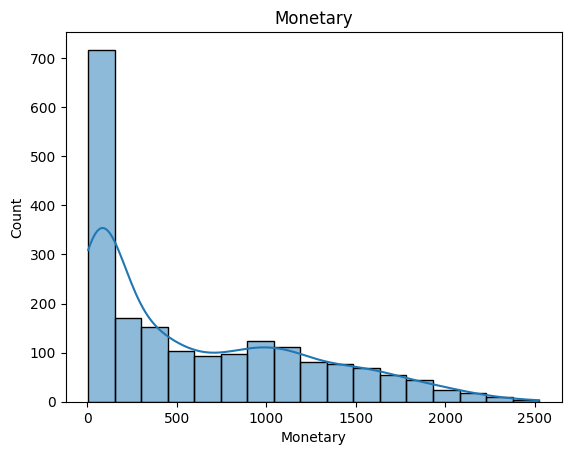

In [ ]:
# Monetary Value
monetary = df_clustering[['ID','Monetary']]
monetary.head(10)

sns.histplot(df_clustering['Monetary'], kde=True)
plt.title('Monetary')


Most customers spend around $200.

In [ ]:
temp = recency.merge(frequency,on='ID')
RFM_Segmentation  = temp.merge(monetary,on='ID')
RFM_Segmentation.columns = ['ID','Recency','Frequency','Monetary']
RFM_Segmentation.head(10)

,ID,Recency,Frequency,Monetary
0,5524,58,25,1617
1,2174,38,6,27
2,4141,26,21,776
3,6182,26,8,53
4,5324,94,19,422
5,7446,16,22,716
6,965,34,21,590
7,6177,32,10,169
8,4855,19,6,46
9,2125,82,16,1102


###Data Processing
* Standardising data
* Principal Component Analysis (PCA)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist,pdist

In [ ]:
# Standardising Data
scaler = StandardScaler()
cols_for_clustering = ['Recency', 'Frequency', 'Monetary']
data_scaled = df_clustering.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(df_clustering[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Recency,Frequency,Monetary
count,1.953000e+03,1.953000e+03,1.953000e+03
mean,1.073272e-16,-8.640753e-17,-2.728659e-17
std,1.000256e+00,1.000256e+00,1.000256e+00
min,-1.708965e+00,-1.943959e+00,-9.997172e-01
25%,-8.402846e-01,-9.018806e-01,-8.941992e-01
50%,2.839557e-02,9.937895e-03,-3.534193e-01
75%,8.623285e-01,7.914966e-01,7.215455e-01
max,1.731009e+00,3.787472e+00,3.155055e+00


The mean value for all columns is almost zero and the standard deviation is almost 1. All the data points were replaced by their z-scores.

In [ ]:
# Principal Component Analysis (PCA)

pca = decomposition.PCA(n_components = 3)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]
data_scaled['pc3'] = pca_res[:,2]
data_scaled.head()

,ID,Age,Years_joining_as_customer,Age_joining_as_customer,Recency,Income,KidHome,TeenHome,Complaints,Cmp1,...,CatalogPurchases,DealPurchases,StorePurchases,WebPurchases,WebVisitsMonth,Frequency,Monetary,pc1,pc2,pc3
0,5524,67,12,55,0.306373,58138.0,0,0,0,0,...,10,3,4,8,7,1.312536,1.658018,2.110172,0.231258,0.243578
1,2174,70,10,60,-0.388571,46344.0,1,1,0,0,...,1,2,2,1,5,-1.162400,-0.963445,-1.516199,-0.333867,0.141642
2,4141,59,11,48,-0.805537,71613.0,0,0,0,0,...,2,1,10,8,4,0.791497,0.271445,0.722130,-0.833029,-0.365554
3,6182,40,10,30,-0.805537,26646.0,1,0,0,0,...,0,2,4,2,6,-0.901881,-0.920579,-1.316819,-0.758688,-0.011143
4,5324,43,10,33,1.557273,58293.0,1,0,0,0,...,3,5,6,5,5,0.530977,-0.312201,0.210592,1.549110,-0.600346


###K-means Clustering

K-means clustering is an unsupervised machine learning algorithm used to cluster data based on similarity. K-means clustering usually works well in practice and scales well to the large datasets.

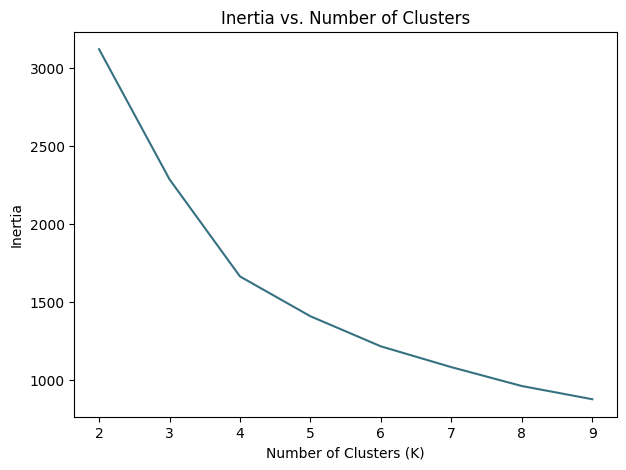

In [ ]:
# Elbow Method
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K,n_init=10, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

The "elbow" shows that the optimal cluster is around 4 clusters as it provides a good balance between reducing inertia and avoiding overfitting.

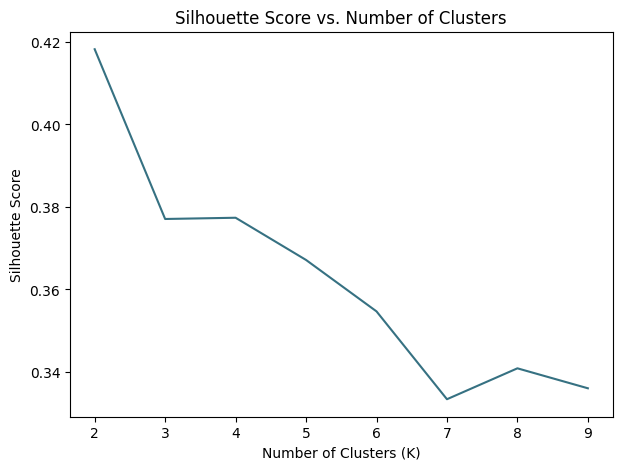

In [ ]:
# Silhouette score analysis
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, n_init=10, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


The Silhouette Method suggests that 2 clusters provide the best separation and cohesion for the dataset. A higher silhouette score indicates that the clusters are well-separated, while a lower score suggests that the clusters may overlap or are poorly defined.

We chose 4 clusters as the best option for our dataset. While the Silhouette Score peaks at k=2, indicating better-defined clusters, the Elbow Method suggests an optimal point at k=4. Opting for 4 clusters provides greater flexibility for future adjustments. If our data or business requirements evolve, having more clusters allows us to better capture the diversity in customer behavior, making our segmentation more adaptable to changing needs.

In [ ]:
model = KMeans(n_clusters=4, n_init=10, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
# cluster start with 1
data_scaled['k Cluster'] = model.predict(data_scaled[cols_for_clustering]) + 1
# Adding variables to df_clustering
df_clustering['k Means Cluster'] = data_scaled['k Cluster']
df_clustering["pc1"]=data_scaled['pc1']
df_clustering["pc2"]=data_scaled['pc2']
df_clustering["pc3"]=data_scaled['pc3']
df_clustering.head()

,ID,Age,Years_joining_as_customer,Age_joining_as_customer,Recency,Income,KidHome,TeenHome,Complaints,Cmp1,...,DealPurchases,StorePurchases,WebPurchases,WebVisitsMonth,Frequency,Monetary,k Means Cluster,pc1,pc2,pc3
0,5524,67,12,55,58,58138.0,0,0,0,0,...,3,4,8,7,25,1617,1,2.110172,0.231258,0.243578
1,2174,70,10,60,38,46344.0,1,1,0,0,...,2,2,1,5,6,27,3,-1.516199,-0.333867,0.141642
2,4141,59,11,48,26,71613.0,0,0,0,0,...,1,10,8,4,21,776,4,0.722130,-0.833029,-0.365554
3,6182,40,10,30,26,26646.0,1,0,0,0,...,2,4,2,6,8,53,3,-1.316819,-0.758688,-0.011143
4,5324,43,10,33,94,58293.0,1,0,0,0,...,5,6,5,5,19,422,1,0.210592,1.549110,-0.600346


###Gaussian Mixture Model (GMM)

Gaussian Mixture Model (GMM) clustering is a probabilistic approach that assumes data points are generated from a mixture of Gaussian distributions using the Expectation-Maximization algorithm to assign points to clusters based on likelihood.

In [ ]:
from sklearn.mixture import GaussianMixture

# Fit GMM with a range of clusters to find the best one
gmm_scores = []
for K in range(2, 10):
    gmm = GaussianMixture(n_components=K, random_state=7)
    gmm.fit(X)
    labels = gmm.predict(X)
    gmm_scores.append(silhouette_score(X, labels))

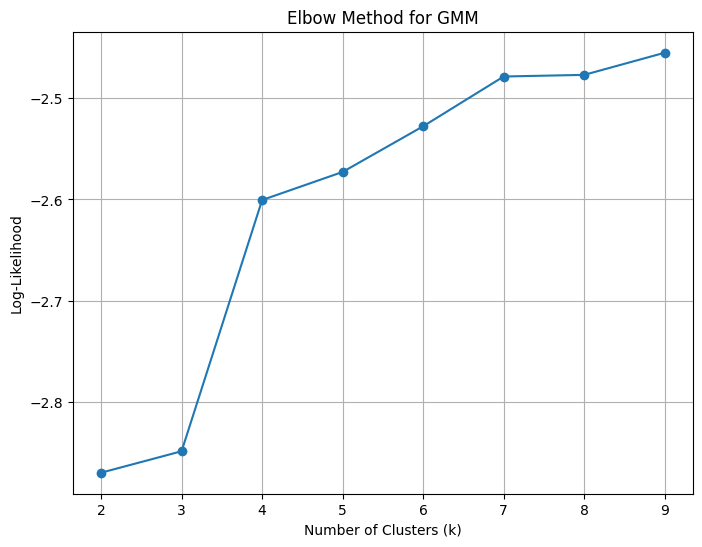

In [ ]:
# Range of cluster numbers to test
k_range = range(2, 10)
log_likelihoods = []

# Fit GMM for different numbers of clusters and store the log-likelihood
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    log_likelihoods.append(gmm.score(X))  # The log-likelihood of the model

# Plot log-likelihood vs number of clusters (elbow plot)
plt.figure(figsize=(8, 6))
plt.plot(k_range, log_likelihoods, marker='o')
plt.title('Elbow Method for GMM')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.show()

Based on the Elbow Method plot, k=4 is a suitable choice as the log-likelihood shows a notable increase up to this point, after which the improvement slows. This suggests that four clusters capture the main structure in the data effectively.

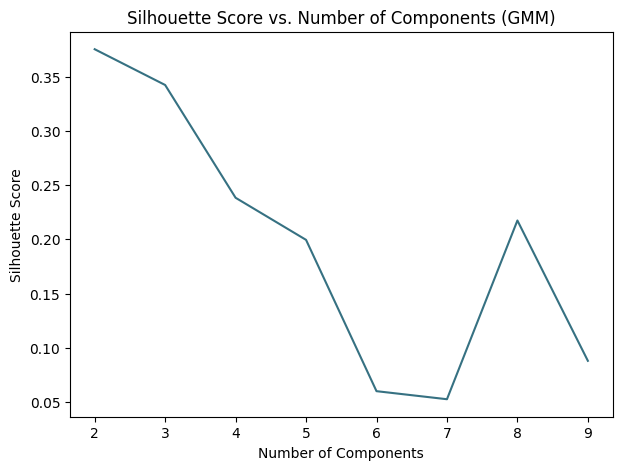

In [ ]:
# Plot silhouette scores for GMM
plt.figure(figsize=[7,5])
plt.plot(range(2, 10), gmm_scores, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Components (GMM)")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score")
plt.show()

The highest Silhouette Score is at k=2, indicating that 2 components (or clusters) would be optimal.


We chose 4 clusters based on the Elbow Method, which suggests this number captures the main structure in the data. Although the Silhouette Method recommended 2 clusters, using 4 allows us to see finer differences between customer groups. This extra detail helps us tailor marketing strategies to meet the unique needs of each segment more effectively.

In [ ]:
# Set optimal number of components based on silhouette score or BIC
gmm = GaussianMixture(n_components=4, random_state=7)
gmm.fit(X)
df_clustering['GMM Cluster'] = gmm.predict(X) + 1  # Start cluster labels from 1
df_clustering.head()

,ID,Age,Years_joining_as_customer,Age_joining_as_customer,Recency,Income,KidHome,TeenHome,Complaints,Cmp1,...,StorePurchases,WebPurchases,WebVisitsMonth,Frequency,Monetary,k Means Cluster,pc1,pc2,pc3,GMM Cluster
0,5524,67,12,55,58,58138.0,0,0,0,0,...,4,8,7,25,1617,1,2.110172,0.231258,0.243578,4
1,2174,70,10,60,38,46344.0,1,1,0,0,...,2,1,5,6,27,3,-1.516199,-0.333867,0.141642,2
2,4141,59,11,48,26,71613.0,0,0,0,0,...,10,8,4,21,776,4,0.722130,-0.833029,-0.365554,1
3,6182,40,10,30,26,26646.0,1,0,0,0,...,4,2,6,8,53,3,-1.316819,-0.758688,-0.011143,2
4,5324,43,10,33,94,58293.0,1,0,0,0,...,6,5,5,19,422,1,0.210592,1.549110,-0.600346,3


###Hierarchical Clustering

Hierarchical clustering builds a tree-like structure of nested clusters by either merging smaller clusters (agglomerative) or splitting larger ones (divisive) based on similarity measures.

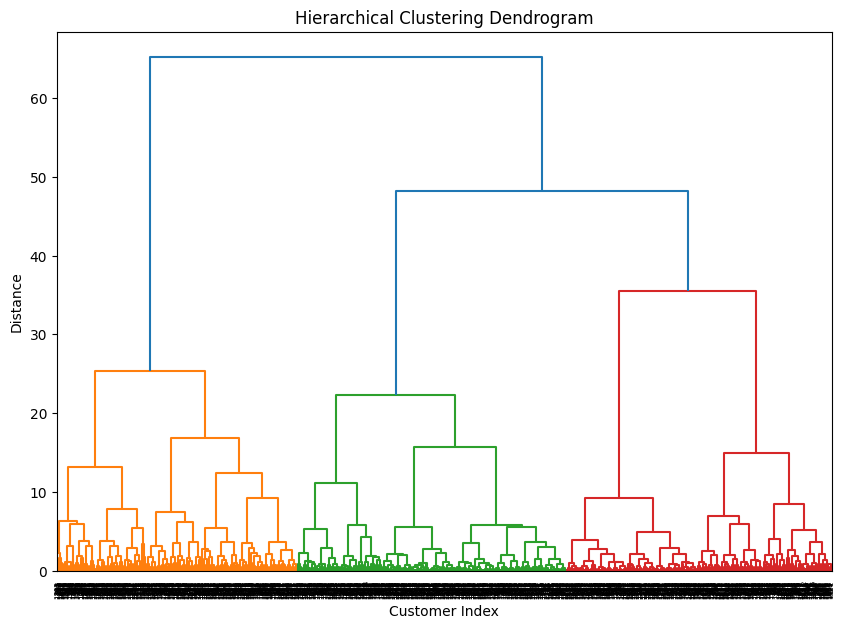

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix for the dendrogram
linkage_matrix = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()

Based on the dendrogram, the data can be grouped into three main clusters. The height at which the clusters are joined indicates their similarity with the three main branches representing distinct groups. Cutting the dendrogram at a height of around 40 separates the data into three clear clusters. This suggests that the data naturally divides into three major groups.

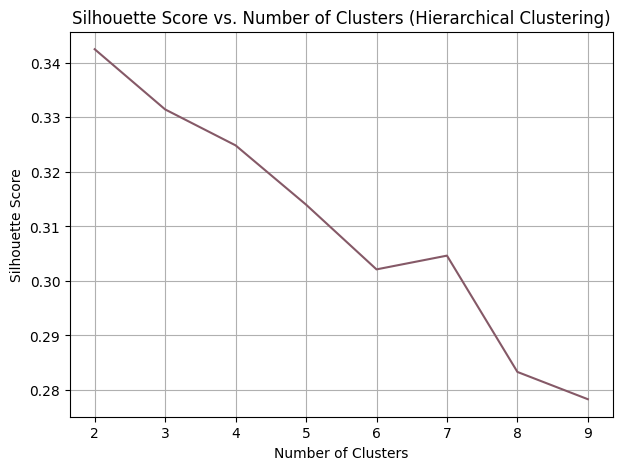

In [ ]:
# Fit Hierarchical Clustering with a range of clusters and calculate silhouette scores
hierarchical_scores = []
for K in range(2, 10):
    hc = AgglomerativeClustering(n_clusters=K, linkage='ward')
    labels = hc.fit_predict(X)

    # Calculate the silhouette score
    score = silhouette_score(X, labels)
    hierarchical_scores.append(score)

# Plot silhouette scores for Hierarchical Clustering
plt.figure(figsize=[7, 5])
plt.plot(range(2, 10), hierarchical_scores, color=(133 / 255, 89 / 255, 103 / 255))
plt.title("Silhouette Score vs. Number of Clusters (Hierarchical Clustering)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


The Silhouette Method suggests that 2 clusters is the optimal choice for the data as it gives the highest silhouette score of 0.35. This indicates a moderate level of separation between the clusters suggesting that two clusters is a reasonable and effective choice for grouping the data.

Although the Silhouette Method suggests 2 clusters with a moderate score of 0.35, we chose 3 clusters based on the dendrogram which clearly shows a natural division at a reasonable cutting height. While the silhouette score indicates some overlap in features, the dendrogram provides a stronger visual representation of how the data naturally groups into 3 distinct clusters. This choice enhances customer segmentation and targeting allowing for more refined and tailored marketing strategies.

In [ ]:
# Fit Agglomerative Clustering with optimal clusters
hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_clustering['Hierarchical Cluster'] = hierarchical_model.fit_predict(X) + 1
df_clustering.head()

,ID,Age,Years_joining_as_customer,Age_joining_as_customer,Recency,Income,KidHome,TeenHome,Complaints,Cmp1,...,WebPurchases,WebVisitsMonth,Frequency,Monetary,k Means Cluster,pc1,pc2,pc3,GMM Cluster,Hierarchical Cluster
0,5524,67,12,55,58,58138.0,0,0,0,0,...,8,7,25,1617,1,2.110172,0.231258,0.243578,4,2
1,2174,70,10,60,38,46344.0,1,1,0,0,...,1,5,6,27,3,-1.516199,-0.333867,0.141642,2,1
2,4141,59,11,48,26,71613.0,0,0,0,0,...,8,4,21,776,4,0.722130,-0.833029,-0.365554,1,1
3,6182,40,10,30,26,26646.0,1,0,0,0,...,2,6,8,53,3,-1.316819,-0.758688,-0.011143,2,1
4,5324,43,10,33,94,58293.0,1,0,0,0,...,5,5,19,422,1,0.210592,1.549110,-0.600346,3,3


###Compare Model Performance

In order to choose the best clustering model, we compare the three models in terms of:
* Silhouette scores
* Average RFM values
* 3D plot cluster analysis
* Cluster distribution
* Cross-tabulation

In [ ]:
# Silhouette Scores for each method
kmeans_silhouette = silhouette_score(X, df_clustering['k Means Cluster'] - 1)  # Adjust for zero-based indexing
gmm_silhouette = silhouette_score(X, df_clustering['GMM Cluster'] - 1)
hierarchical_silhouette = silhouette_score(X, df_clustering['Hierarchical Cluster'] - 1)

print("Silhouette Scores:")
print(f"K-means: {kmeans_silhouette}")
print(f"GMM: {gmm_silhouette}")
print(f"Hierarchical: {hierarchical_silhouette}")

Silhouette Scores:
K-means: 0.3773728857573844
GMM: 0.23829471583407702
Hierarchical: 0.33145715951136145


The K-means clustering model achieved the highest silhouette score among the models evaluated indicating well-separated and cohesive clusters. It shows that K-means effectively captures the structure of the data and outperforms other clustering methods in terms of cluster quality.

In [ ]:
# Average R, F, M values for each model

# Calculate average R, F, M values for each K-means cluster
kmeans_avg_rfm = df_clustering.groupby('k Means Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Calculate average R, F, M values for GMM clusters
gmm_avg_rfm = df_clustering.groupby('GMM Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Calculate average R, F, M values for Hierarchical clusters
hierarchical_avg_rfm = df_clustering.groupby('Hierarchical Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

print("\nAverage RFM values per cluster for each model:")
print("\nK-means Clusters:\n", kmeans_avg_rfm)
print("\nGMM Clusters:\n", gmm_avg_rfm)
print("\nHierarchical Clusters:\n", hierarchical_avg_rfm)


Average RFM values per cluster for each model:

K-means Clusters:
                    Recency  Frequency     Monetary
k Means Cluster                                   
1                73.089980  21.529652  1139.574642
2                73.448940   8.851638   129.605010
3                23.596117   8.850485   138.768932
4                23.351163  22.013953  1158.146512

GMM Clusters:
                Recency  Frequency     Monetary
GMM Cluster                                   
1            21.206704  22.092179  1237.787709
2            48.377888   6.212871    49.714521
3            49.162791  13.957364   297.279070
4            71.410148  21.712474  1199.439746

Hierarchical Clusters:
                         Recency  Frequency     Monetary
Hierarchical Cluster                                   
1                     19.541916  13.095808   383.929641
2                     57.423394  22.275124  1331.752883
3                     71.008850  10.143068   190.482301


**K-means Clusters**  
- Cluster 1 have **recent with high frequency and monetary values** to indicate loyal and high-value customers.  
-Cluster 4 have **high frequency and monetary values** but lower recency to indicate high-value customers.  
- Cluster 2 shows **recent but low-value customers** with low frequency and monetary values but high recency.
- Cluster 3 represents **low-value customers** with low frequency and monetary.  
-k-means clustering offers clear differentiation particularly between high and low-value customers.

---

**GMM Clusters**  
- Cluster 1 captures **very frequent, high-value customers** with low recency.
- Cluster 2 consists of **very low-value customers** with extremely low frequency and monetary values.  
- Cluster 3 indicates **moderate-value customers** with low monetary and frequency values.
- Cluster 4 represents **high-value but slightly less frequent customers** with moderate recency.  
- GMM shows well-separated clusters but has overlapping segments compared to K-means.

---

**Hierarchical Clusters**  
- Cluster 1 includes **moderate-value customers**.
- Cluster 2 captures **frequent, very high-value customers**.   
- Cluster 3 represents **low-value customers** with lower frequency and monetary values but higher recency.  
- Hierarchical clustering provides clear segmentation but has broader clusters compared to K-means and GMM.

---

  
**K-means** is the best cluster choice as it provides distinct and interpretable clusters with clear differentiation between high-value, low-value, and recent customers. It also aligns well with the objective of identifying actionable customer segments for targeting.

In [ ]:
#3D cluster plot analysis
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Cluster = df_clustering[['k Means Cluster', 'pc1', 'pc2','pc3']]
# Scatter plot
fig = px.scatter_3d(Cluster, x='pc1', y='pc2', z='pc3', color=Cluster['k Means Cluster'],
                   labels={'0':'pc1','1':'pc2','2':'pc3'})
fig.update_layout(title='k-Means Clustering Analysis')
fig.show()

# Set up cluster data with PCA components for visualization consistency
Cluster_gmm = df_clustering[['GMM Cluster', 'pc1', 'pc2', 'pc3']]
Cluster_hierarchical = df_clustering[['Hierarchical Cluster', 'pc1', 'pc2', 'pc3']]

# 3D Scatter Plot for GMM Clustering
fig_gmm = px.scatter_3d(Cluster_gmm, x='pc1', y='pc2', z='pc3', color=Cluster_gmm['GMM Cluster'],
                        labels={'0':'pc1','1':'pc2','2':'pc3'})
fig_gmm.update_layout(title='GMM Clustering Analysis')
fig_gmm.show()

# 3D Scatter Plot for Hierarchical Clustering
fig_hierarchical = px.scatter_3d(Cluster_hierarchical, x='pc1', y='pc2', z='pc3', color=Cluster_hierarchical['Hierarchical Cluster'],
                                 labels={'0':'pc1','1':'pc2','2':'pc3'})
fig_hierarchical.update_layout(title='Hierarchical Clustering Analysis')
fig_hierarchical.show()


 **K-means Clustering:**  
- The clusters appear compact and well-separated.  
- Each cluster is clearly distinguishable which aligns with the high silhouette score for K-means.  
- The points within clusters show good cohesion meaning that K-means performs well for this dataset.  

---

**GMM Clustering:**  
- GMM clustering produces distinguishable clusters but has some overlapping between cluster boundaries.  
- The Gaussian-based approach allows flexibility but some clusters like the yellow and blue seem less distinct compared to K-means.  
- This suggests that GMM captures variability in the data but may struggle with tighter boundaries.  

---

**Hierarchical Clustering:**  
- Hierarchical clustering shows broader and overlapping clusters.  
- The pink cluster spread over a larger area indicating that it has weaker cohesion.  
- The separation between clusters is less clear which might suggest this method might not be ideal for high-dimensional RFM data.  

---
The K-means model provides the clearest and most compact clusters. GMM is a reasonable alternative but hierarchical clustering lacks the clarity and separation needed for actionable segmentation.

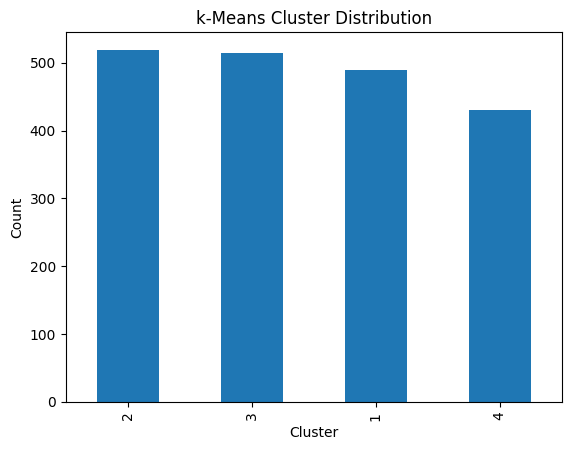

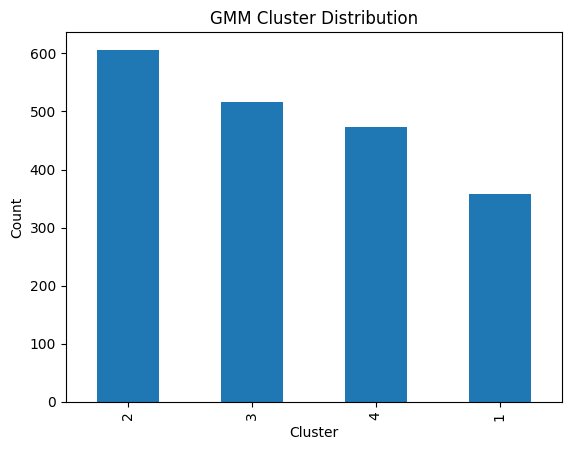

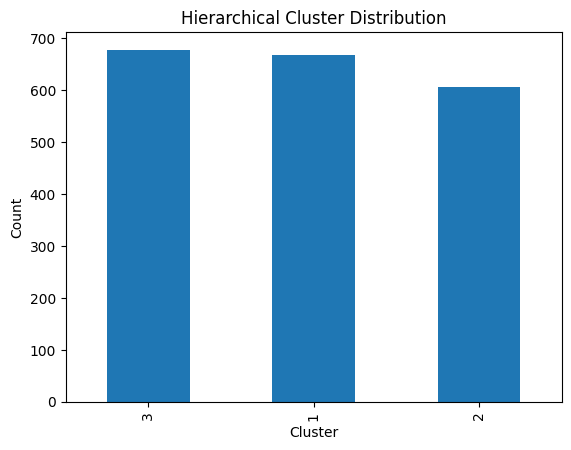

In [ ]:
# Cluster distribution
# Distribution of k-means cluster
df_clustering['k Means Cluster'].value_counts().plot.bar()
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('k-Means Cluster Distribution')
plt.show()

# Distribution of clusters for GMM
df_clustering['GMM Cluster'].value_counts().plot.bar()
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('GMM Cluster Distribution')
plt.show()

# Distribution of clusters for Hierarchical Clustering
df_clustering['Hierarchical Cluster'].value_counts().plot.bar()
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Hierarchical Cluster Distribution')
plt.show()

**k-Means Cluster Distribution**:
  
   - The distribution is relatively balanced but Cluster 4 has a slightly smaller count than the others. This shows the equal-partitioning tendency of k-Means when distributing data into clusters.

---

**GMM Cluster Distribution**:
   - GMM shows more variation in cluster sizes compared to k-Means. This is because GMM accommodates cluster shapes and sizes better which leads to an uneven distribution based on probabilities.

---

**Hierarchical Cluster Distribution**:
   - The hierarchical clustering distribution is more balanced compared to GMM but less balanced than k-Means. Clusters 3 and 1 are dominant, while Cluster 2 is smaller.

---

k-Means shows the most balanced distribution, followed by Hierarchical while GMM showing the most variability.


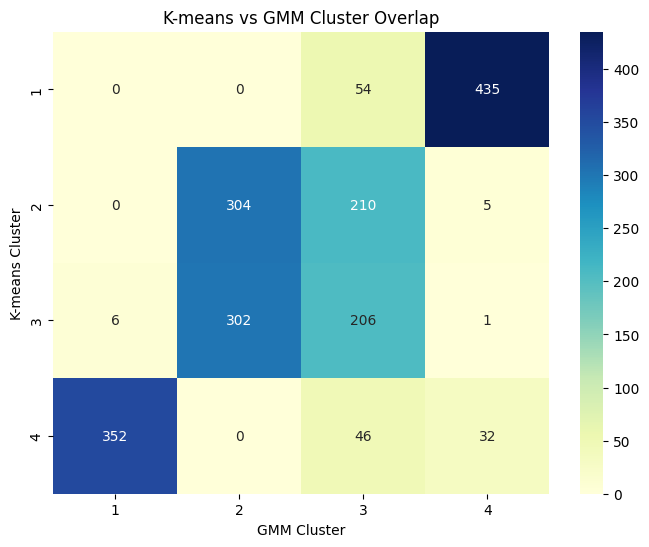

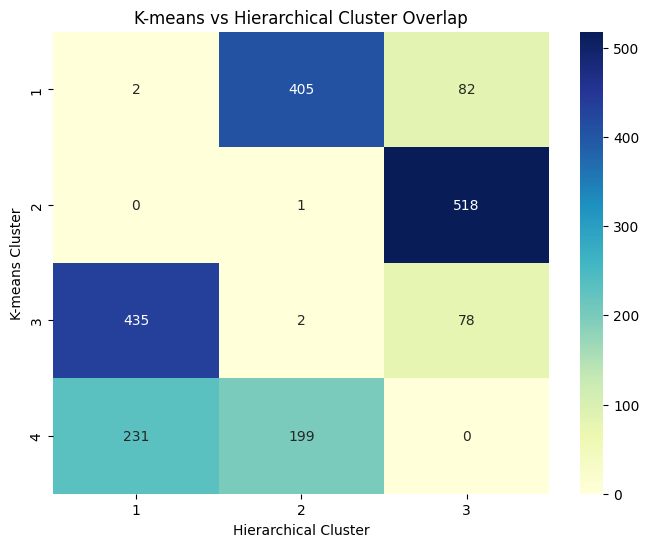

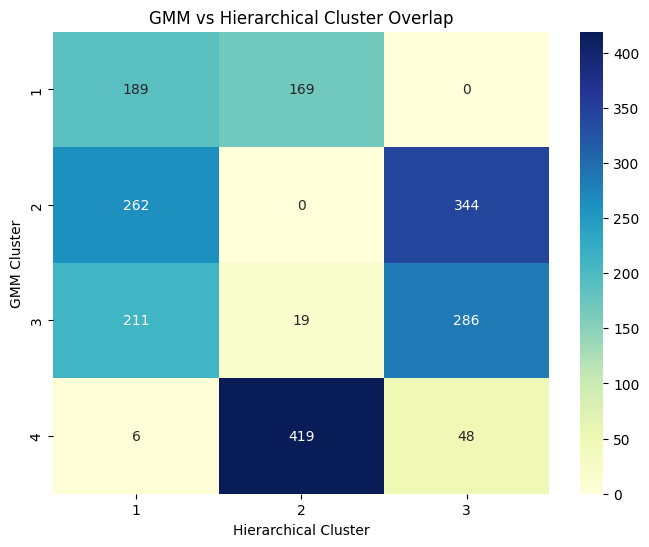

In [ ]:
# Cross-tabulation
# Cross-tabulation between K-means and GMM clusters
kmeans_gmm_crosstab = pd.crosstab(df_clustering['k Means Cluster'], df_clustering['GMM Cluster'])
plt.figure(figsize=(8, 6))
# Heatmap for K-means vs GMM
sns.heatmap(kmeans_gmm_crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("K-means vs GMM Cluster Overlap")
plt.xlabel("GMM Cluster")
plt.ylabel("K-means Cluster")
plt.show()


# Cross-tabulation between K-means and Hierarchical clusters
kmeans_hierarchical_crosstab = pd.crosstab(df_clustering['k Means Cluster'], df_clustering['Hierarchical Cluster'])
plt.figure(figsize=(8, 6))
# Heatmap for K-means vs Hierarchical
sns.heatmap(kmeans_hierarchical_crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("K-means vs Hierarchical Cluster Overlap")
plt.xlabel("Hierarchical Cluster")
plt.ylabel("K-means Cluster")
plt.show()


# Cross-tabulation between GMM and Hierarchical clusters
gmm_hierarchical_crosstab = pd.crosstab(df_clustering['GMM Cluster'], df_clustering['Hierarchical Cluster'])
plt.figure(figsize=(8, 6))
# Heatmap for GMM vs Hierarchical
sns.heatmap(gmm_hierarchical_crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("GMM vs Hierarchical Cluster Overlap")
plt.xlabel("Hierarchical Cluster")
plt.ylabel("GMM Cluster")
plt.show()

Cross-tabulation between clustering models helps evaluate the consistency of cluster assignments by comparing overlaps by providing insights into the stability and interpretability of clusters across the models. This helps in selecting the best model by identifying the one that aligns well with our objectives to produce meaningful segmentation.


**K-means vs. GMM**
- K-means cluster 1 overlaps largely with GMM cluster 4 (435 points).
- K-means cluster 2 corresponds strongly with GMM cluster 2 (304 points).
-There are off-diagonal overlaps. K-means cluster 2 also overlaps significantly with GMM cluster 3 (210 points) indicating  mixed alignment.
- While there is some consistency the mapping between K-means and GMM is not perfectly aligned.

---
**K-means vs. Hierarchical Clustering**
- K-means cluster 2 aligns almost entirely with Hierarchical cluster 2 (518 points).
- K-means cluster 3 overlaps strongly with Hierarchical cluster 1 (435 points).
- However, K-means cluster 4 overlaps with both Hierarchical cluster 1 (231 points) and cluster 2 (199 points). This indicates some off-diagonal discrepancies.
- K-means and Hierarchical clustering are relatively more consistent with each other as it has a stronger alignment compared to k-means vs GMM .

---

**GMM vs. Hierarchical Clustering**
- GMM cluster 4 overlaps strongly with Hierarchical cluster 2 (419 points).
- GMM cluster 3 aligns largely with Hierarchical cluster 3 (286 points).
- However, GMM cluster 1 is split between Hierarchical clusters 1 (189 points) and 2 (169 points) indicating mixed alignment.
- GMM and Hierarchical clustering show a reasonable level of consistency but the alignment is not as strong as between K-means and Hierarchical clustering.

---

- K-means vs. Hierarchical Clustering shows the strongest alignment as the clusters mapping are  more cleanly to one another compared to the other two pairings.
-The alignment between these two models shows minimal off-diagonal discrepancies meaning their clusters represent similar groupings of customers.
- **K-means or hierarchical clustering appears to provide the most effective customer segmentation.**

#### **The Best Clustering Model**

**K-Means clustering** is the best model as it has  the highest silhouette score (0.3774) with clearly distinguishable, compact, and well-separated clusters along with a balanced cluster distribution. Additionally, the average RFM values highlight clear differentiation between clusters and cross-tabulation confirms that K-Means delivers effective and meaningful segmentation.


## **2.5 Predictive Model**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [ ]:
df_predictive = df[['Age', 'Years_joining_as_customer','Recency', 'Income', 'KidHome', 'TeenHome', 'Complaints',
                    'Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5', 'Cmp6', 'Education', 'Marital_Status',
                    'WineSales', 'FruitSales', 'MeatSales', 'FishSales', 'SweetSales', 'GoldSales',
                    'CatalogPurchases', 'DealPurchases', 'StorePurchases', 'WebPurchases', 'WebVisitsMonth',
                    'Total_purchases', 'Sales']].copy()

print(df_predictive.dtypes)

Age                            int64
Years_joining_as_customer      int32
Recency                        int64
Income                       float64
KidHome                        int64
TeenHome                       int64
Complaints                     int64
Cmp1                           int64
Cmp2                           int64
Cmp3                           int64
Cmp4                           int64
Cmp5                           int64
Cmp6                           int64
Education                     object
Marital_Status                object
WineSales                      int64
FruitSales                     int64
MeatSales                      int64
FishSales                      int64
SweetSales                     int64
GoldSales                      int64
CatalogPurchases               int64
DealPurchases                  int64
StorePurchases                 int64
WebPurchases                   int64
WebVisitsMonth                 int64
Total_purchases                int64
S

In [ ]:
# Create binary column for categorical data (Education and Marital_Status)
encoded_education = pd.get_dummies(df_predictive['Education'], prefix='', prefix_sep='')
encoded_marital_status = pd.get_dummies(df_predictive['Marital_Status'], prefix='', prefix_sep='')

# Rename the columns
encoded_education.columns = ['Education_Graduation', 'Education_PhD', 'Education_Master', 'Education_Others']
encoded_marital_status.columns = ['Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Married', 'Marital_Status_Divorced', 'Marital_Status_Widow', 'Marital_Status_Others']

# Concatenate the one-hot encoded columns with the original DataFrame
df_predictive = pd.concat([df_predictive, encoded_education, encoded_marital_status], axis=1)

# Drop the original 'Education' and 'Marital_Status' columns
df_predictive.drop(['Education', 'Marital_Status'], axis=1, inplace=True)

print(df_predictive.dtypes)

Age                            int64
Years_joining_as_customer      int32
Recency                        int64
Income                       float64
KidHome                        int64
TeenHome                       int64
Complaints                     int64
Cmp1                           int64
Cmp2                           int64
Cmp3                           int64
Cmp4                           int64
Cmp5                           int64
Cmp6                           int64
WineSales                      int64
FruitSales                     int64
MeatSales                      int64
FishSales                      int64
SweetSales                     int64
GoldSales                      int64
CatalogPurchases               int64
DealPurchases                  int64
StorePurchases                 int64
WebPurchases                   int64
WebVisitsMonth                 int64
Total_purchases                int64
Sales                          int64
Education_Graduation            bool
E

In [ ]:
X = df_predictive.drop(columns='Cmp6')
y = df_predictive['Cmp6']

print(y.value_counts())

Cmp6
0    1669
1     284
Name: count, dtype: int64


In [ ]:
# Apply SelectKBest for feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

Selected features: Index(['Years_joining_as_customer', 'Recency', 'Cmp1', 'Cmp3', 'Cmp4', 'Cmp5',
       'WineSales', 'MeatSales', 'CatalogPurchases', 'Sales'],
      dtype='object')


In [ ]:
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_selected.shape[1])

scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores,})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

Original number of features: 35
Reduced number of features: 10
                      Feature       Score
11                       Cmp5  212.684773
7                        Cmp1  189.937701
9                        Cmp3  139.892249
24                      Sales  137.653154
12                  WineSales  128.450155
14                  MeatSales  106.635741
2                     Recency   94.228010
18           CatalogPurchases   93.818642
1   Years_joining_as_customer   67.554173
10                       Cmp4   65.094031
8                        Cmp2   61.688605
23            Total_purchases   40.274333
17                  GoldSales   39.947089
21               WebPurchases   38.322373
5                    TeenHome   37.323537
3                      Income   31.402985
32    Marital_Status_Divorced   26.368901
13                 FruitSales   22.522633
30    Marital_Status_Together   20.803392
15                  FishSales   17.760036
16                 SweetSales   16.836923
28           

In [ ]:
# Split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Create SMOTE object
smote = SMOTE(random_state=42)

# Use SMOTE to perform oversampling to training dataset
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(y_train_res.value_counts())

Cmp6
0    1335
1    1335
Name: count, dtype: int64


In [ ]:
# Convert X_train_res back to a DataFrame
X_train_res = pd.DataFrame(X_train_res, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

In [ ]:
# Scaling
scaler = StandardScaler()
X_train_res[['Years_joining_as_customer', 'Recency',
             'WineSales', 'MeatSales', 'CatalogPurchases', 'Sales']] = scaler.fit_transform(
           X_train_res[['Years_joining_as_customer', 'Recency',
                        'WineSales', 'MeatSales', 'CatalogPurchases', 'Sales']])

X_test[['Years_joining_as_customer', 'Recency',
        'WineSales', 'MeatSales', 'CatalogPurchases', 'Sales']] = scaler.transform(
    X_test[['Years_joining_as_customer', 'Recency',
            'WineSales', 'MeatSales', 'CatalogPurchases', 'Sales']])

In [ ]:
# Output the size of the datasets after splitting
print("Training set feature size:", X_train_res.shape)
print("Test set feature size:", X_test.shape)
print("Training set target variable size:", y_train_res.shape)
print("Test set target variable size:", y_test.shape)

Training set feature size: (2670, 10)
Test set feature size: (391, 10)
Training set target variable size: (2670,)
Test set target variable size: (391,)


In [ ]:
kf = StratifiedKFold(n_splits=5 , shuffle=True, random_state=42)

def evaluate_train_model(model):

    scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
    scores = cross_validate(model, X_train_res, y_train_res, cv=kf, scoring=scoring_metrics)

    mean_accuracy = np.mean(scores['test_accuracy']) * 100
    mean_precision = np.mean(scores['test_precision']) * 100
    mean_recall = np.mean(scores['test_recall']) * 100
    mean_f1 = np.mean(scores['test_f1']) * 100

    print("Average accuracy: {:.4f}%".format(mean_accuracy))
    print("Average precision: {:.4f}%".format(mean_precision))
    print("Average recall: {:.4f}%".format(mean_recall))
    print("Average F1-score: {:.4f}%".format(mean_f1))

#### Default Parameters

Use default parameters for the following classifiers:

*   Logistic Regression
*   Decision Tree
*   Random Forest

In [ ]:
# Logistic Regression
lr = LogisticRegression(random_state=42)

evaluate_train_model(lr)

Average accuracy: 78.5768%
Average precision: 79.0358%
Average recall: 77.7528%
Average F1-score: 78.3723%


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)

evaluate_train_model(dt)

Average accuracy: 88.2772%
Average precision: 87.2423%
Average recall: 89.7378%
Average F1-score: 88.4496%


In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

evaluate_train_model(rf)

Average accuracy: 92.6592%
Average precision: 92.7745%
Average recall: 92.5843%
Average F1-score: 92.6596%


Logistic Regression provides a solid baseline performance with decent metrics across the board. Random Forest outperforms both Logistic Regression and Decision Tree, showing the highest accuracy and balanced precision, recall, and F1-score. This suggests that Random Forest, with its ensemble approach, captures more complex patterns in the data, making it the best-performing model among the three.

### Tuning Hyperparameter

We conduct a GridSearch for each chosen hyperparameter and select the one with the highest F1-score.

In [ ]:
# Function to find the best parameters for a model
def find_best_parameters(model, param_grid):
  # Create GridSearchCV
  grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=kf, verbose=1, n_jobs=-1, refit='F1')
  grid_search.fit(X_train_res, y_train_res)
  best_f1_score = grid_search.best_score_

  # Print the best parameters and best F1-score
  print("Best parameters:", grid_search.best_params_)
  print("Best cross-validation F1-score: {:.4f}%".format(grid_search.best_score_*100))
  return grid_search.best_estimator_, best_f1_score


In [ ]:
# Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 300, 400]
}

lr_best_model, lr_best_f1 = find_best_parameters(lr, lr_param_grid)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameters: {'C': 0.1, 'max_iter': 50, 'solver': 'liblinear'}
Best cross-validation F1-score: 78.6716%


In [ ]:
# Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

dt_best_model, dt_best_f1 = find_best_parameters(dt, dt_param_grid)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation F1-score: 89.2558%


In [ ]:
# Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

rf_best_model, rf_best_f1 = find_best_parameters(rf, rf_param_grid)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation F1-score: 92.7698%


### Model Evaluation Metric

### Confusion Matrix, Accuracy, Precision, Recall, and F1-score

In [ ]:
# Function to evaluate the model on the test data
def evaluate_test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    print(f"\nModel: {model.__class__.__name__}")
    print('\nConfusion Matrix:')
    print(cm)
    print('\nTest Set Accuracy: {:.4f}%'.format(accuracy))
    print('Test Set Precision: {:.4f}%'.format(precision))
    print('Test Set Recall: {:.4f}%'.format(recall))
    print('Test Set F1-Score: {:.4f}%'.format(f1))

    return accuracy, precision, recall, f1


Model: LogisticRegression

Confusion Matrix:
[[273  61]
 [  9  48]]

Test Set Accuracy: 82.0972%
Test Set Precision: 44.0367%
Test Set Recall: 84.2105%
Test Set F1-Score: 57.8313%

Model: DecisionTreeClassifier

Confusion Matrix:
[[299  35]
 [ 22  35]]

Test Set Accuracy: 85.4220%
Test Set Precision: 50.0000%
Test Set Recall: 61.4035%
Test Set F1-Score: 55.1181%

Model: RandomForestClassifier

Confusion Matrix:
[[314  20]
 [ 26  31]]

Test Set Accuracy: 88.2353%
Test Set Precision: 60.7843%
Test Set Recall: 54.3860%
Test Set F1-Score: 57.4074%


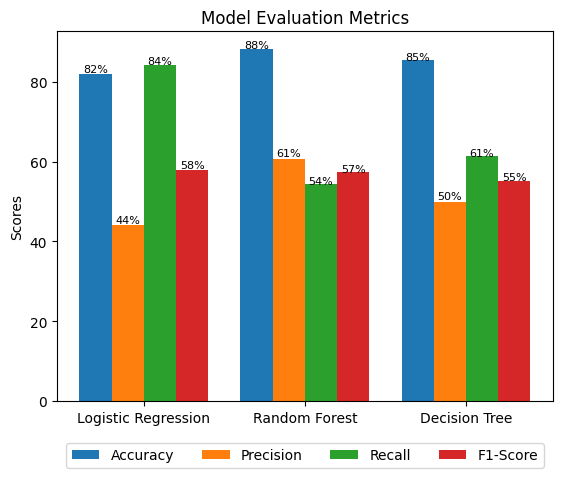

In [ ]:
# Plot a bar chart to compare performance of models

# Initialize lists to store evaluation metrics
models = [lr_best_model, dt_best_model, rf_best_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

# Evaluate models and store metrics
for model, name in zip(models, model_names):
    metrics = evaluate_test_model(model, X_test, y_test)
    accuracy_values.append(metrics[0])
    precision_values.append(metrics[1])
    recall_values.append(metrics[2])
    f1_values.append(metrics[3])

# Sort the models based on accuracy in descending order
sorted_indices = np.argsort(f1_values)[::-1]
model_names = [model_names[i] for i in sorted_indices]
accuracy_values = [accuracy_values[i] for i in sorted_indices]
precision_values = [precision_values[i] for i in sorted_indices]
recall_values = [recall_values[i] for i in sorted_indices]
f1_values = [f1_values[i] for i in sorted_indices]

# Plotting
labels = model_names
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3/2 * width, accuracy_values, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision_values, width, label='Precision')
rects3 = ax.bar(x + width/2, recall_values, width, label='Recall')
rects4 = ax.bar(x + 3/2 * width, f1_values, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add exact values above each bar
for rects in [rects1, rects2, rects3, rects4]:
    for rect in rects:
        yval = round(rect.get_height())
        plt.text(rect.get_x() + rect.get_width()/2.0, yval, "{}%".format(yval), ha='center', va='bottom', fontsize=8)

# Move the legend to the bottom
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4)

plt.show()

Random Forest remains the best-performing model in terms of accuracy and overall metrics, both before and after tuning. Hyperparameter tuning provided marginal improvements in accuracy for Logistic Regression and Decision Tree, but also revealed trade-offs in precision and recall.

### ROC Curve and Precision Recall Curve

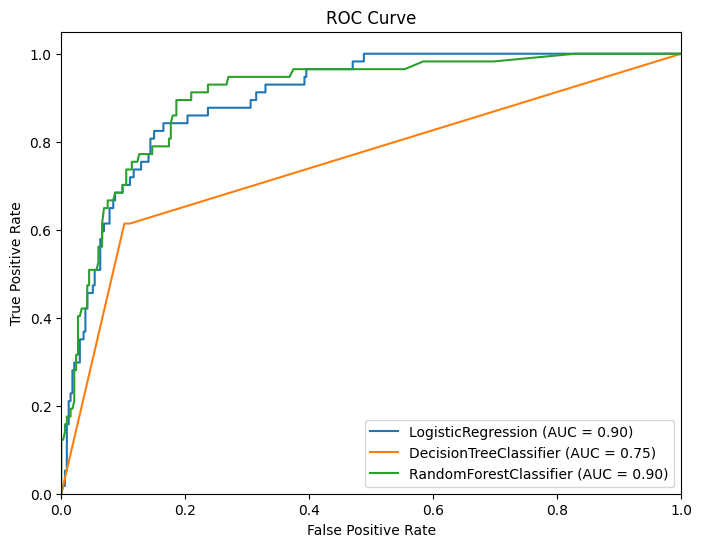

In [ ]:
# Function to plot the ROC curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for model in models:
        probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, probs)
        auc_value = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_value:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot the ROC curves for each model
plot_roc_curve(models, X_test, y_test)

Both Logistic Regression and Random Forest have high AUC values of 0.90, indicating excellent model performance. These models are effective at classifying positive and negative instances.

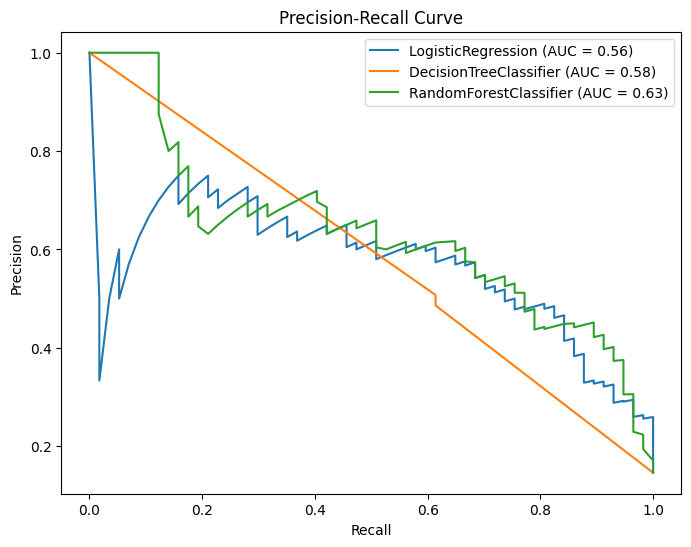

In [ ]:
# Function to plot the Precision-Recall curve
def plot_precision_recall_curve(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for model in models:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{model.__class__.__name__} (AUC = {pr_auc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

# Plot the Precision-Recall curves for each model
plot_precision_recall_curve(models, X_test, y_test)

The Precision-Recall Curve analysis demonstrates that the Random Forest Classifier is the best-performing model in terms of maintaining a good balance between precision and recall, followed by the Decision Tree and Logistic Regression.

## **2.6 Customer Profiling**

* Membership tier
*   Age distribution by cluster
*   Total spending vs income by cluster
* Education status by cluster
* Marital status by cluster
* Number of customer's children at home by cluster
* Count of Customers for Target Campaign (Cmp6)

In [ ]:
# Calculate average R, F, M values for each K-means cluster
kmeans_avg_rfm = df_clustering.groupby('k Means Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

print("\nAverage RFM values for k-means clustering:")
kmeans_avg_rfm


Average RFM values for k-means clustering:


,Recency,Frequency,Monetary
k Means Cluster,,,
1,73.089980,21.529652,1139.574642
2,73.448940,8.851638,129.605010
3,23.596117,8.850485,138.768932
4,23.351163,22.013953,1158.146512


Based on average RFM values we can catagorize the customer clusters into membership-tiers:

|Cluster  | Tier  | Characteristics  |
|-------|----------|----------------------------------|
| 1   | Platinum | Recent, high frequency & monetary (loyal) |
| 4   | Gold | High frequency & monetary, low recency |
| 2   | Silver | Recent, low frequency & monetary |
| 3 | Bronze | Low recency, frequency & monetary |


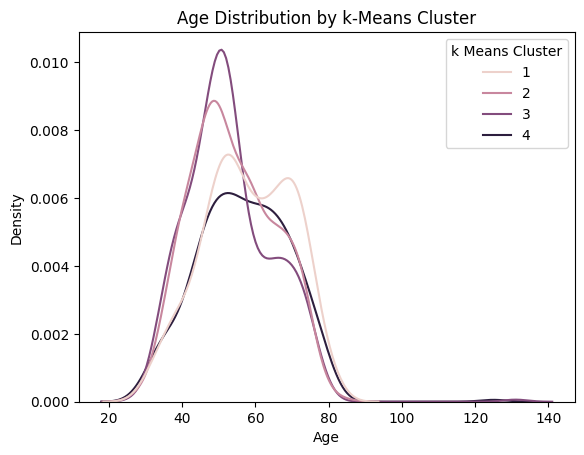

In [ ]:
sns.kdeplot(data=df_clustering, x='Age', hue='k Means Cluster')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by k-Means Cluster')
plt.show()

Platinum members (cluster 1) shows high density in the senior age group, particularly after retirement age. Bronze members (cluster 3) dominates the younger age range which is those before 40 years old. Silver (clusters 2) and gold members (cluster 4) cover quite a broad range of middle-aged individuals.

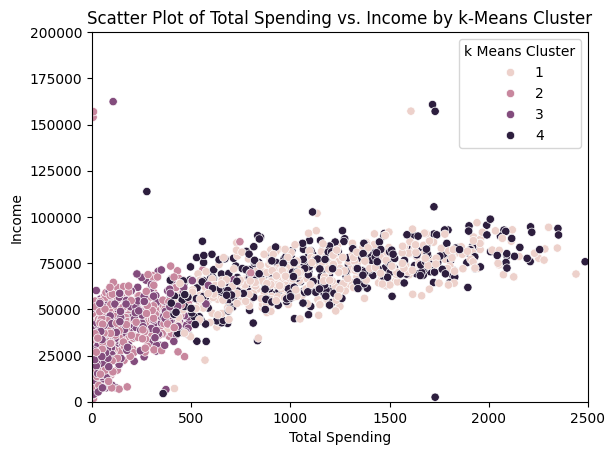

In [ ]:
sns.scatterplot(data=df_clustering, x='Monetary', y='Income', hue='k Means Cluster')
plt.xlabel('Total Spending')
plt.ylabel('Income')
plt.xlim(0, 2500)
plt.ylim(0, 200000)
plt.title('Scatter Plot of Total Spending vs. Income by k-Means Cluster')
plt.show()

The overall pattern in the scatter plot suggests a roughly linear relationship, where higher income levels are associated with higher total spending. Silver (Cluster 2) and bronze members (cluster 3) represents individuals with lower total spending and income, indicating a budget-conscious group. Platinum (Cluster 1) and gold members (cluster 4) shows a wider range in both spending and income.

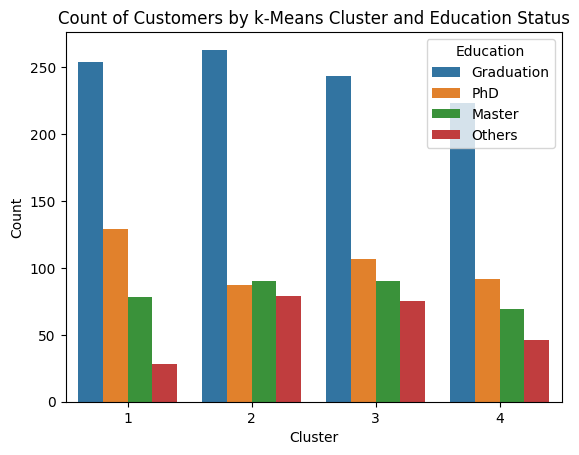

In [ ]:
sns.countplot(data=df_clustering, x='k Means Cluster', hue='Education')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Customers by k-Means Cluster and Education Status')
plt.show()

Graduation-level education is the most common across all clusters, indicating a generally well-educated customer base. PhDs and Masters make up significant proportions, especially in platinum members (clusters 1) and bronze members (cluster 3), suggesting higher educational qualifications.

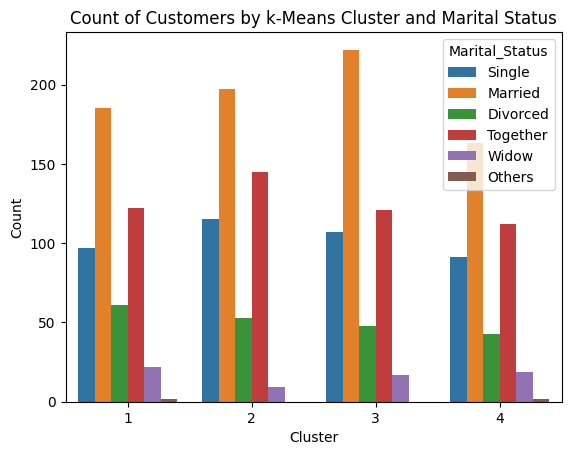

In [ ]:
sns.countplot(data=df_clustering, x='k Means Cluster', hue='Marital_Status')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Customers by k-Means Cluster and Marital Status')
plt.show()

A significant portion of the customer base is married. Together and Single status, these two categories follow behind, suggesting a mix of cohabitating partners and single individuals.

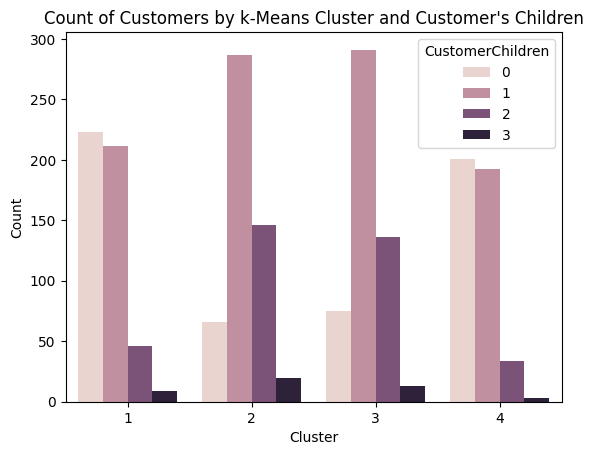

In [ ]:
df_clustering['CustomerChildren'] = df_clustering["KidHome"] + df_clustering['TeenHome'] #total number of kids (baby and teens) at home
sns.countplot(df_clustering, x='k Means Cluster', hue='CustomerChildren')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title("Count of Customers by k-Means Cluster and Customer's Children")
plt.show()

Platinum and gold members (clusters 1 and 4) have a significant proportion of customers with no children, which could indicate a focus on a different lifestyle or life stage. Silver and bronze members (clusters 2 and 3) show a diverse range of family sizes, suggesting varied needs and preferences within these groups.

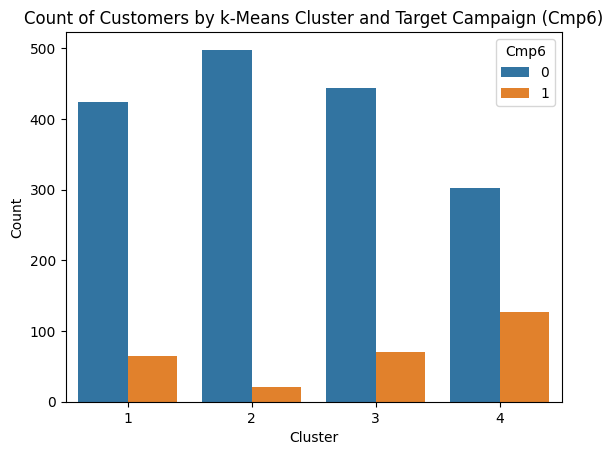

In [ ]:
sns.countplot(data=df_clustering, x='k Means Cluster', hue='Cmp6')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Customers by k-Means Cluster and Target Campaign (Cmp6)')
plt.show()

Gold members (cluster 4) has the highest target of campaign engagement from customers. Gold members is the most responsive to the campaign, whereas silver members (cluster 2) is the least.

# **3.0 Conclusion**

Our predictive model has effectively segmented customers and identified key features influencing purchasing behavior. Notably, recency, catalog purchases, and income, along with sales-related features like MeatSales and StorePurchases, stand out as crucial predictors. The customer segmentation reveals that platinum and gold members share a similar profile, typically aged 40-60, with higher income and spending over $500, and most having no children.

Using these insights, we can create targeted campaigns for platinum and gold member customers. For example, we can create exclusive promotions targeting the 40-60 age group with higher disposable income and no children by bundling premium product lines into the campaign. Since catalog purchases are a key feature in our predictive model, we can incorporate catalogs into the campaign to reach the target market, offering incentives for customers to try new products or categories they haven't purchased yet.

Additionally, the company can leverage our predictive model to develop future targeted marketing campaigns that are more effective and tailored to customer preferences and behaviors. This data-driven approach will enhance customer engagement, satisfaction, and ultimately, drive higher sales.

# **4.0 References**

Nailson. (2020, February 19). Nailson/ifood-data-business-analyst-TEST: Ifood Brain Team Data Challenge for data analysts role. GitHub. https://github.com/nailson/ifood-data-business-analyst-test

Zulaikha, S., Mohamed, H., Kurniawati, M., Rusgianto, S., & Rusmita, S. A. (2020). Customer predictive analytics using artificial intelligence. The Singapore Economic Review, 1–12. https://doi.org/10.1142/s0217590820480021
